## Project Summary
### 1) Business Case:
Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:
* About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
* Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

#### The Goal and Insights of the project are as follows:
* The goal is to predict if the pstient has heart disease or not using ML.
* Prepare a complete data analysis report on the given data.
* Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

     

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading datasets
data=pd.read_csv('values.csv')
con_cad=pd.read_csv('labels.csv')

In [3]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
con_cad

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
con_cad.drop(['patient_id'],axis=1,inplace=True)    ## Dropped patient id as it is already present in other set
con_cad

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [6]:
df=pd.concat([data,con_cad],axis=1)    #merged both the data set as one
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### DOMAIN ANALYSIS:
1. There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
2. Slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3. Thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4. Resting_blood_pressure (type: int): resting blood pressure
5. Chest_pain_type (type: int): chest pain type (4 values)
6. Num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
7. Fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
8. Resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9. Serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
10. Oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11. Sex (type: binary): 0: female, 1: male
12. Age (type: int): age in years
13. Max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
14. Exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


#### Basic Checks

In [7]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [9]:
df.shape

(180, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

* There's no null value.

In [11]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [12]:
df.describe(include='O').T

,count,unique,top,freq
patient_id,180,180,0z64un,1
thal,180,3,normal,98


In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


### Vizualization

In [15]:
# Univariate Analysis
import sweetviz as sv
my_repo=sv.analyze(df)
my_repo.show_html('myrepo.html')

                                             |                                             | [  0%]   00:00 ->…

Report myrepo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights:-
1. Slope_of_peak_exercise_st_segment has 3 categories 1,2,3, 52% of people belong to group 1. 
2. 54% people has normal blood flow to the heart(thal)
3. Most frequent resting blood pressure can be seen in the range of 120 and 150.
4. Majority of people has chest pain type 4 followed by 3,2 and 1.
5. 0 is the most common number of major vessel. 
6. 84% people don't have fasting blood sugar > 120 mg/dl
7. Serum cholesterol tend to vary from 150-550 but have majority frequency between 170 to 325.
8. A large group of population belongs to the age group of 40-65.
9. Out of 180 people only 20 people has heart rate more than 200 or less than 110. 
10. Very few people has exercise related chest pain. 
11. The number of patient who has heart disease and who don't have are very much equal close to a ratio of 5:4

### Bivariate Analysis

In [16]:
df2=df[['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','heart_disease_present']]

In [17]:
#Checking for unique value count

for i in df2:
    print(i,df2[i].unique())
    print(df2[i].value_counts())
    print('******************')

slope_of_peak_exercise_st_segment [1 2 3]
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64
******************
chest_pain_type [2 3 4 1]
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64
******************
num_major_vessels [0 3 2 1]
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64
******************
fasting_blood_sugar_gt_120_mg_per_dl [0 1]
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64
******************
resting_ekg_results [2 0 1]
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64
******************
sex [1 0]
sex
1    124
0     56
Name: count, dtype: int64
******************
exercise_induced_angina [0 1]
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64
******************
heart_disease_present [0 1]
heart_disease_present
0    100
1     80
Name: count, dtype: int64
******************


In [18]:
df.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

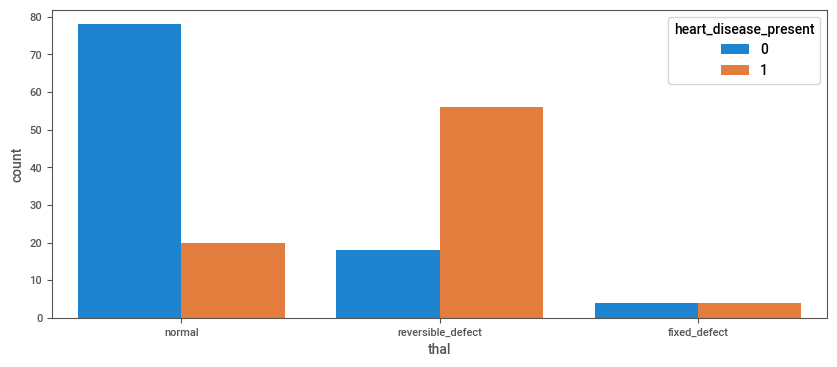

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.thal,hue=df.heart_disease_present,data=df)
plt.show()

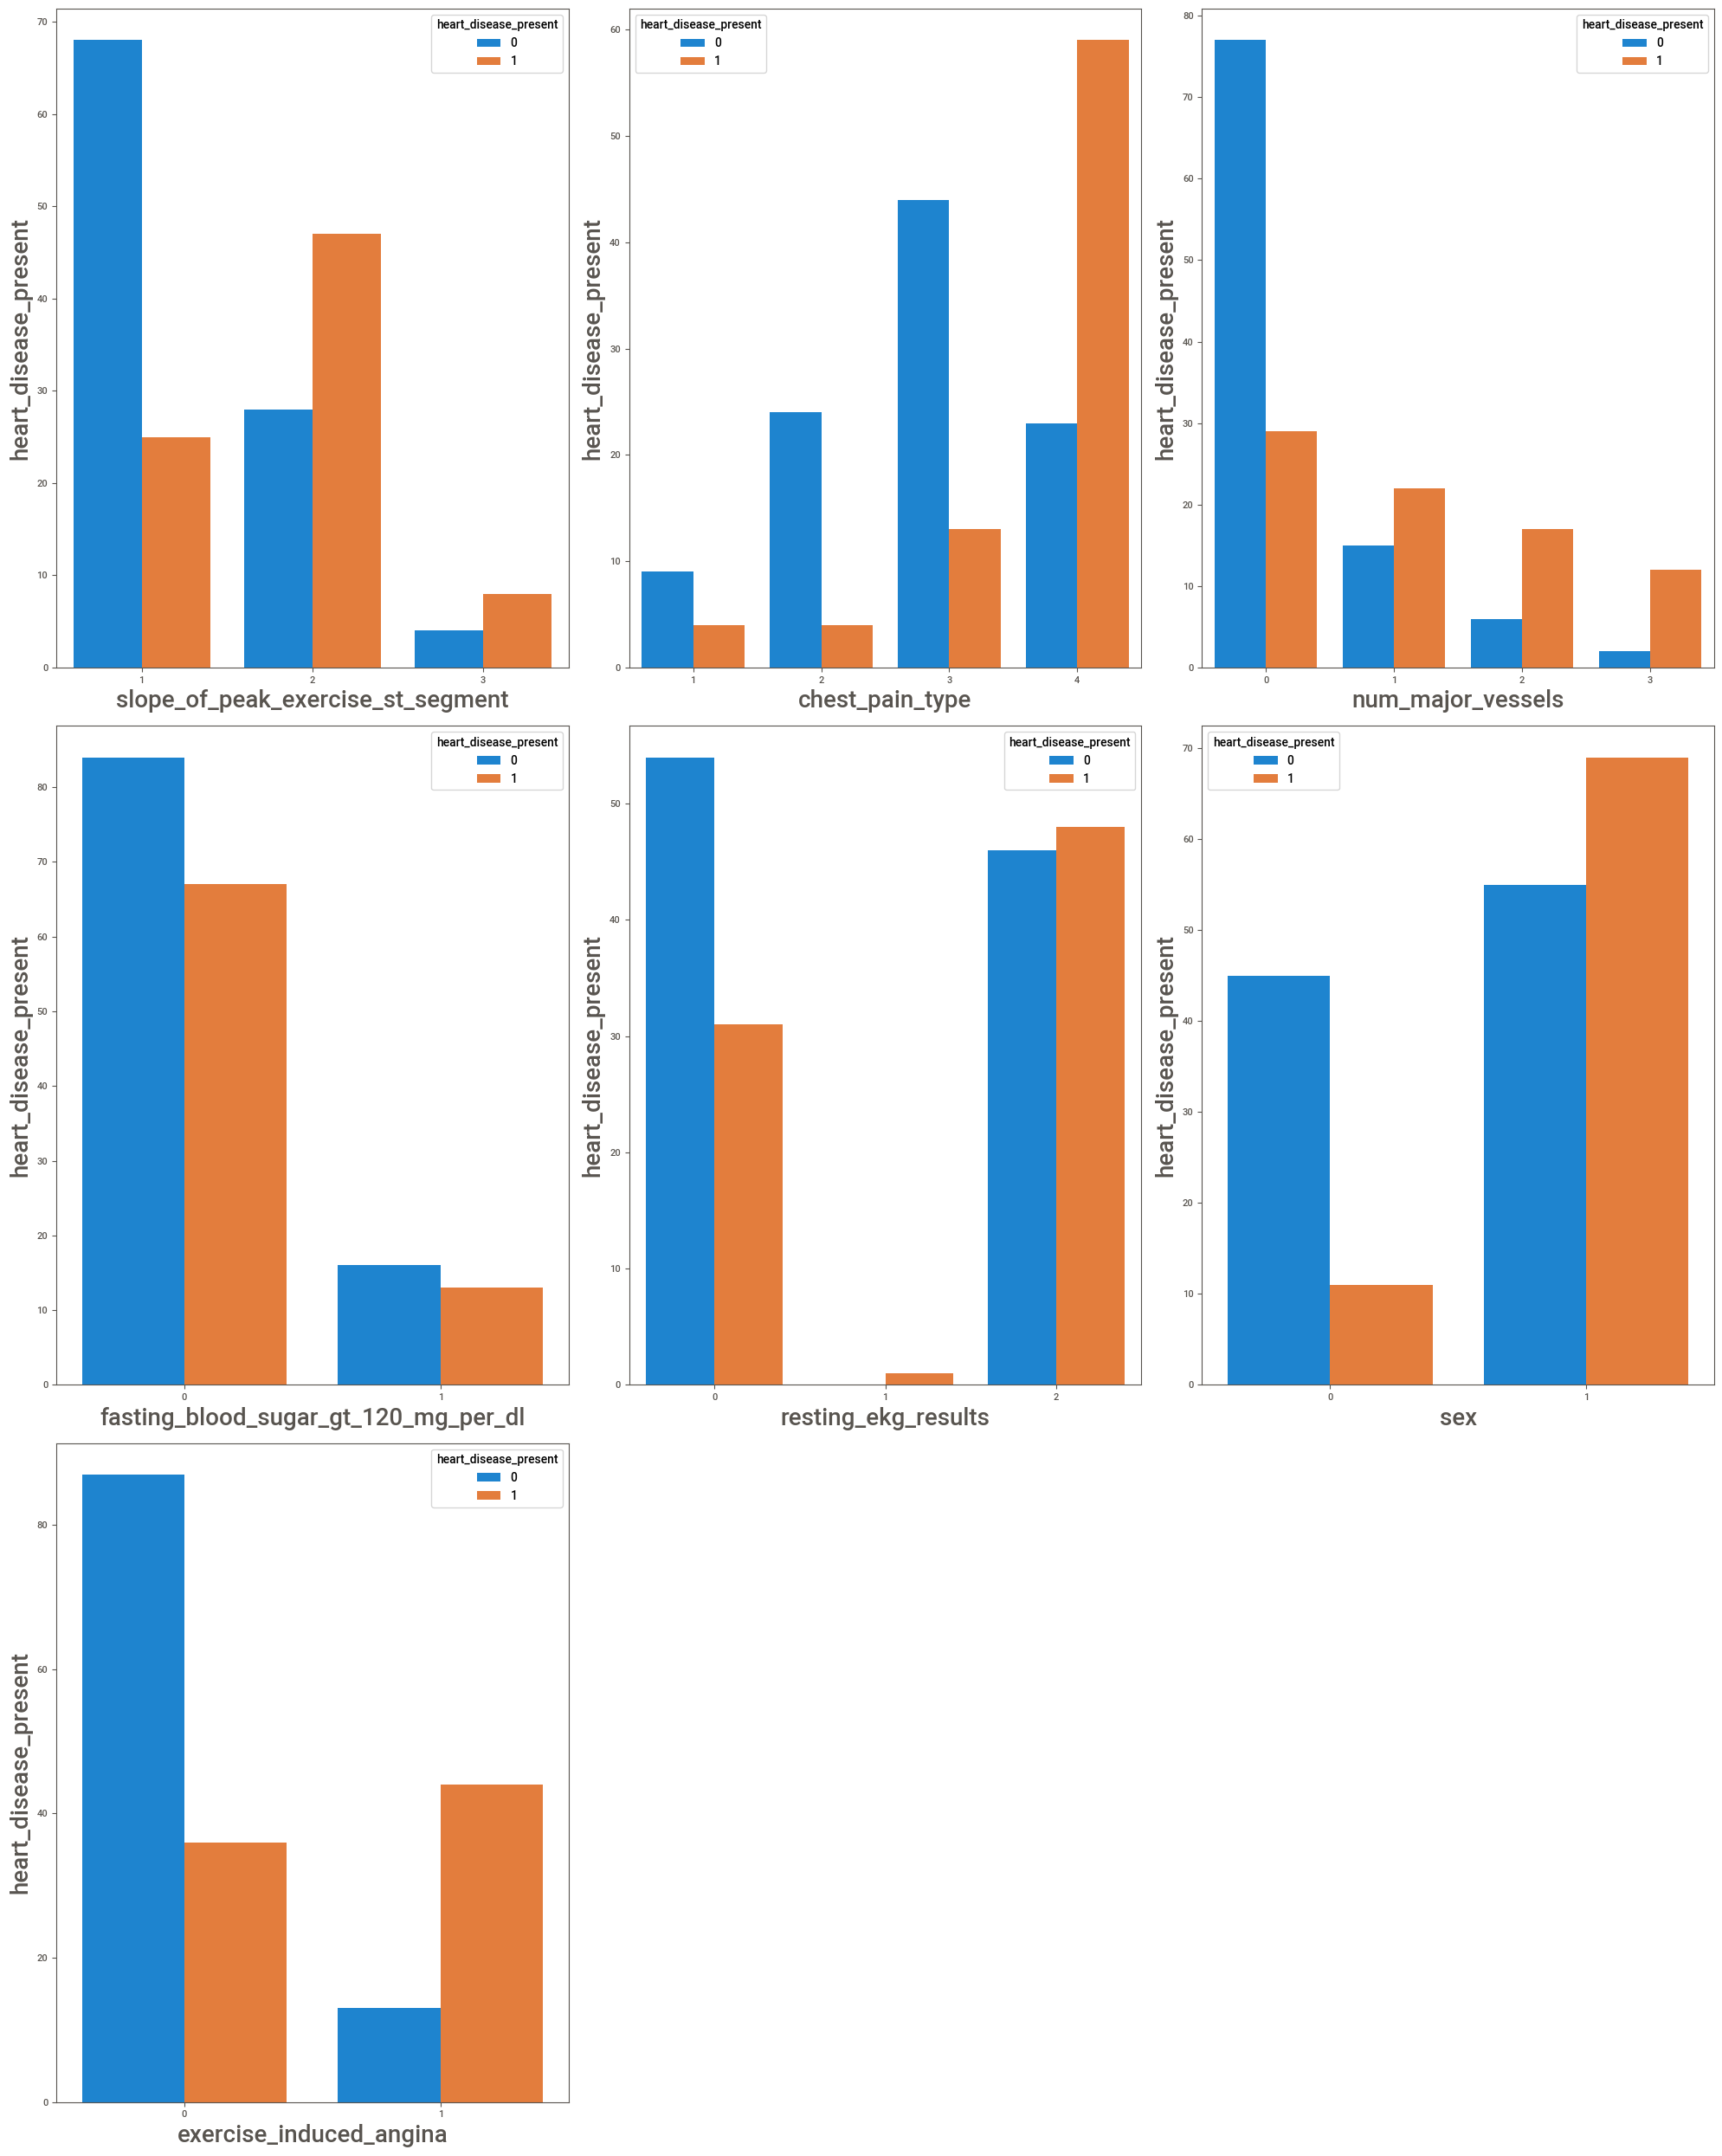

In [20]:
df5=df2.drop('heart_disease_present',axis=1)
plt.figure(figsize=(20,25))
pltno=1
for column in df5:
    if pltno<=11:
        ax=plt.subplot(3,3,pltno)
        sns.countplot(x=df5[column].dropna(axis=0),hue=df.heart_disease_present)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('heart_disease_present',fontsize=20)
    pltno+=1
plt.tight_layout()

#### Insights:-
* A person with reversible_defect blood flow to the heart is most liekely to be heart disease patient.
* People who's quality of blood flow to the heart is in type 2 has the highest chance of being a heart disease patient.
* Chest type 4 indicates the person is more prone to a heart disease than any other chest pain type.
*  As the number of major vessels increase the chances of being a heart disease patient also increase.
*  Majority of people don't have Fasting blood sugar  over 120mg but this does not have a significant result on heart disease.
* electrocardiographic results who's output is 2 has higher chances of having a heart disease.
* A lot of male audience has heart disease.
* if a person is having exercise related chest pain then the person has a high chances of being a heart disease patient.

In [21]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [22]:
df3=df[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']]

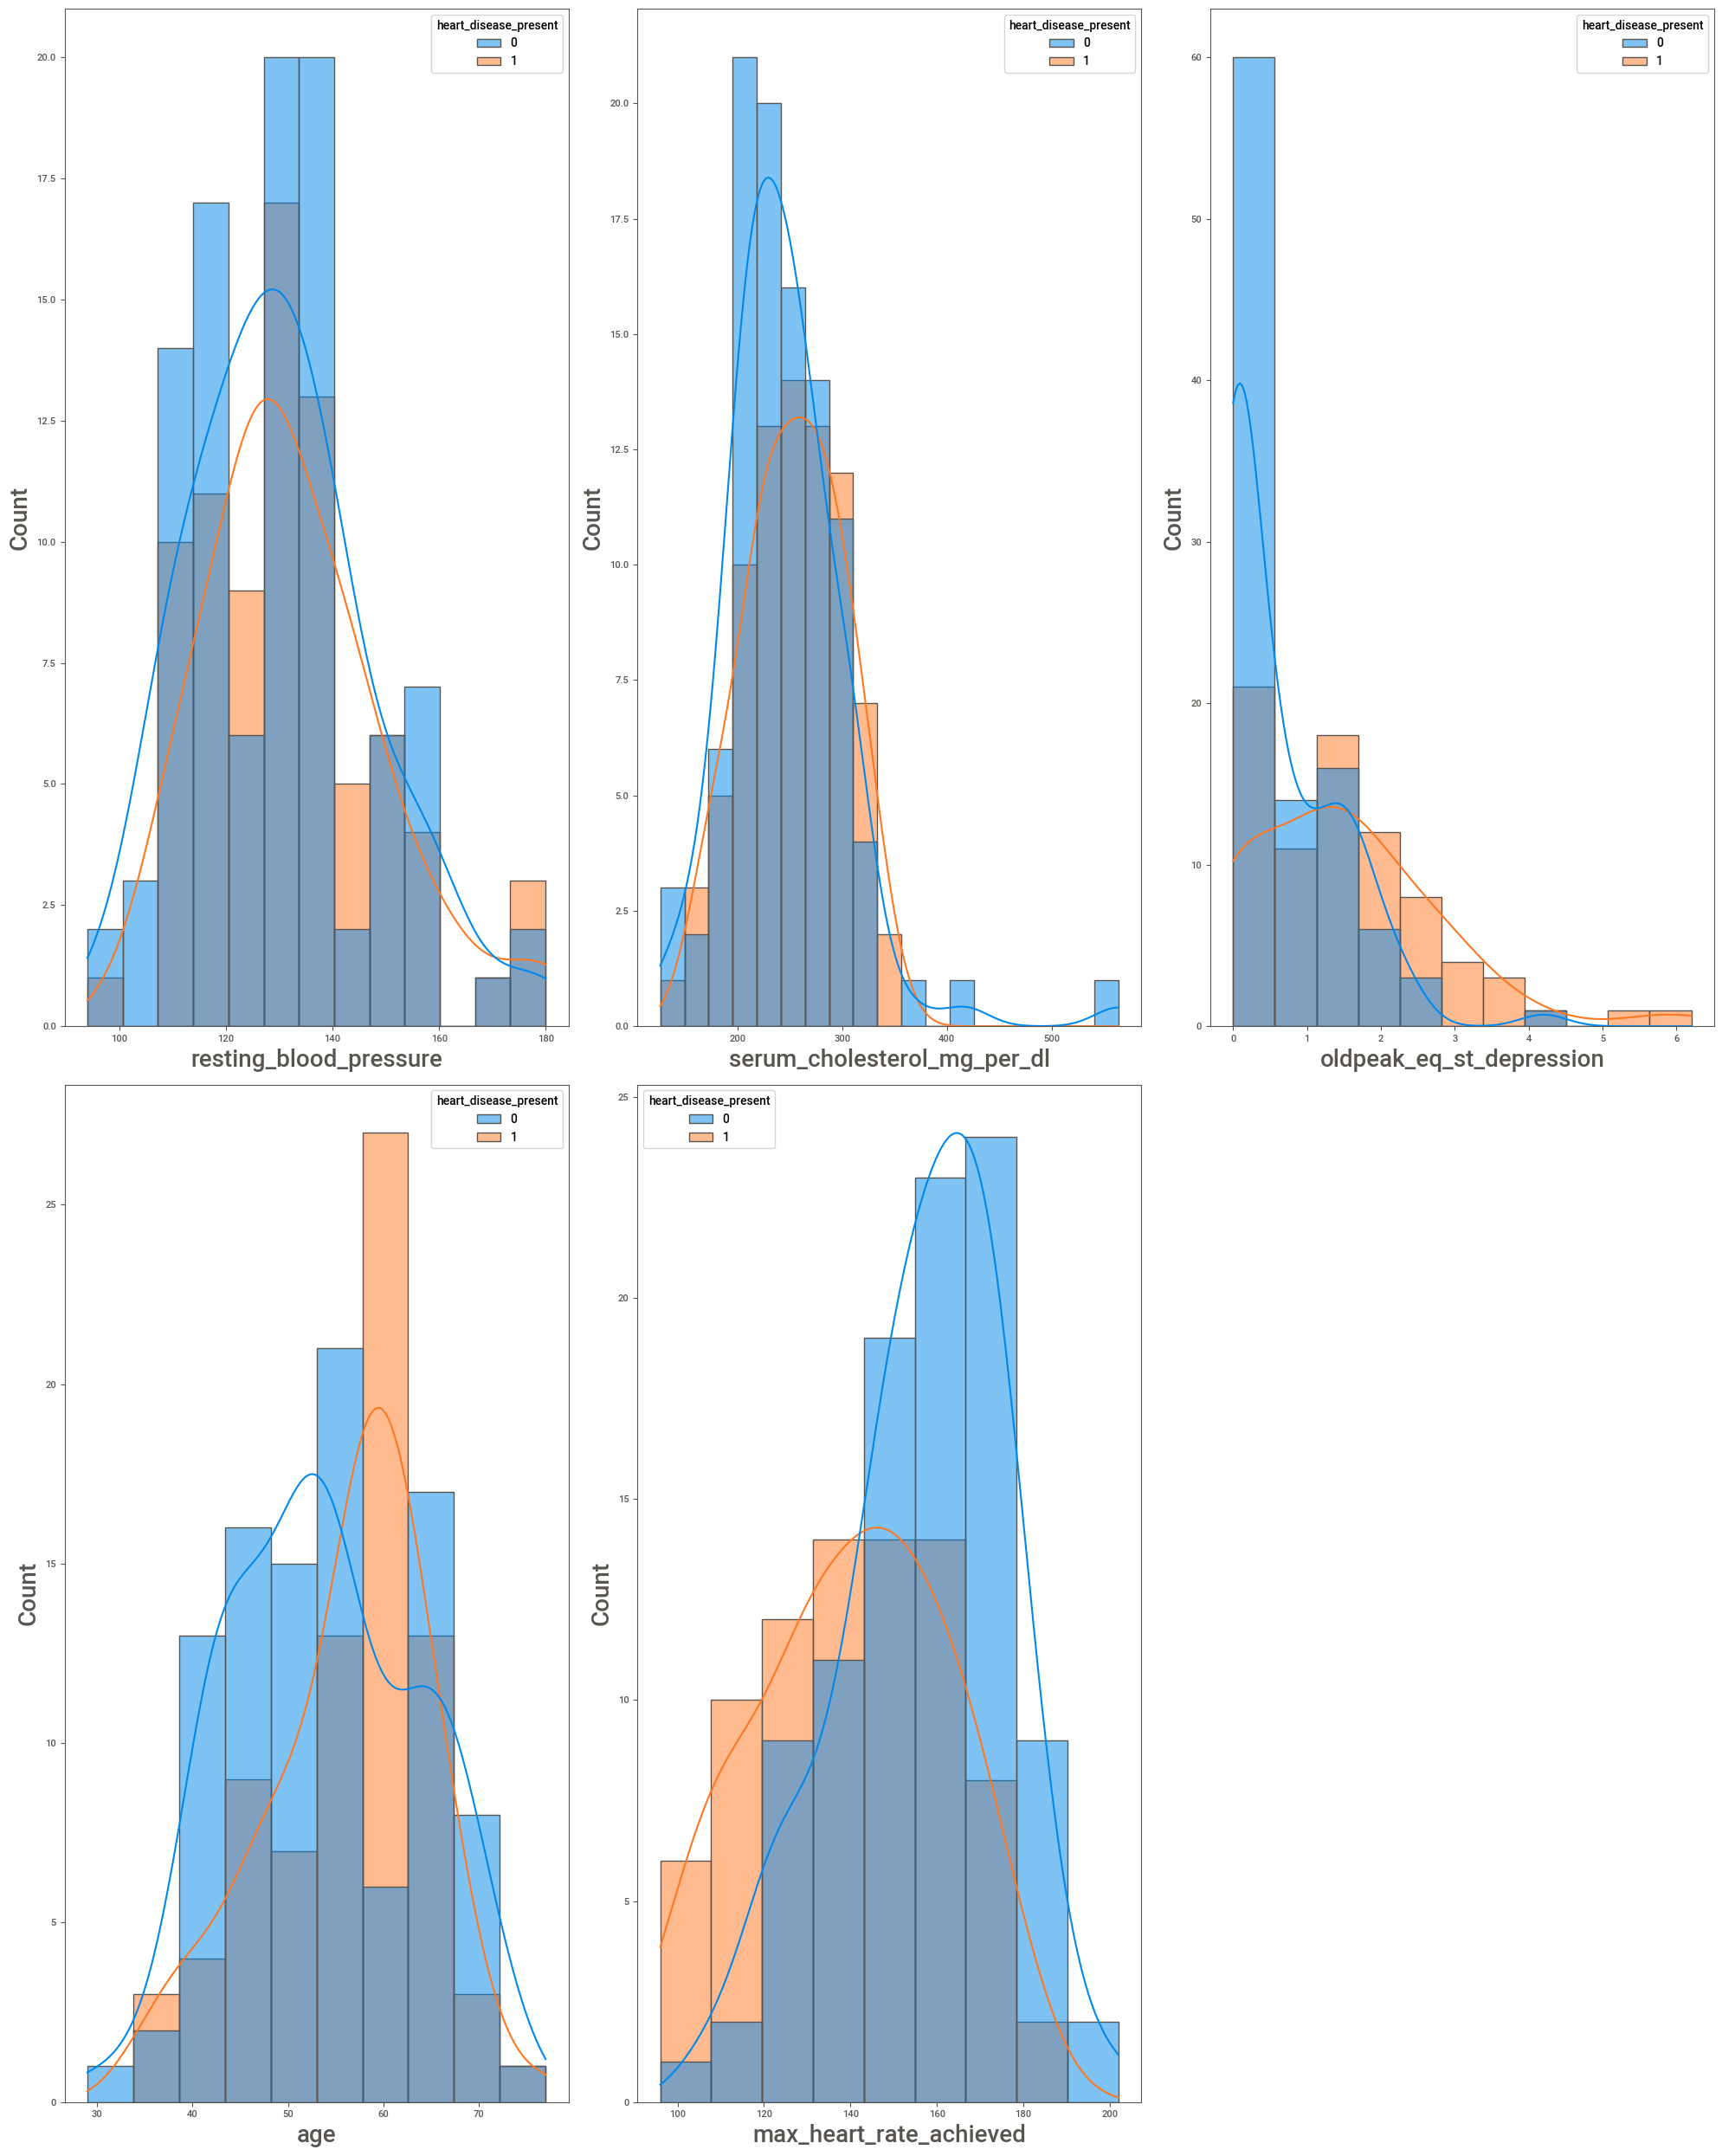

In [23]:
plt.figure(figsize=(20,25))
pltno=1
for column in df3:
    if pltno<=7:
        ax=plt.subplot(2,3,pltno)
        sns.histplot(x=df3[column].dropna(axis=0),hue=df.heart_disease_present,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    pltno+=1
plt.tight_layout()

### Insights:-
* Resting blood pressure doesn't have a significant impact on heart disease.
* Serum Cholesterol shows the person is more likely to be heart disease patient if his Serum Cholesterol mg per dl crosses 275mg/dl.
* Where as ST depression indicates the higher the measure of abnormality in electrocardiograms the higher the chances of heart related disease 
* Higher cases of heart disease can be seen between the age group of 55-65.
* Ideal heart rate for a non heart disease patient is between 140-180,is heart rate is lower than 140 or higher than 180 the person is more likely to have a heart related disease. 

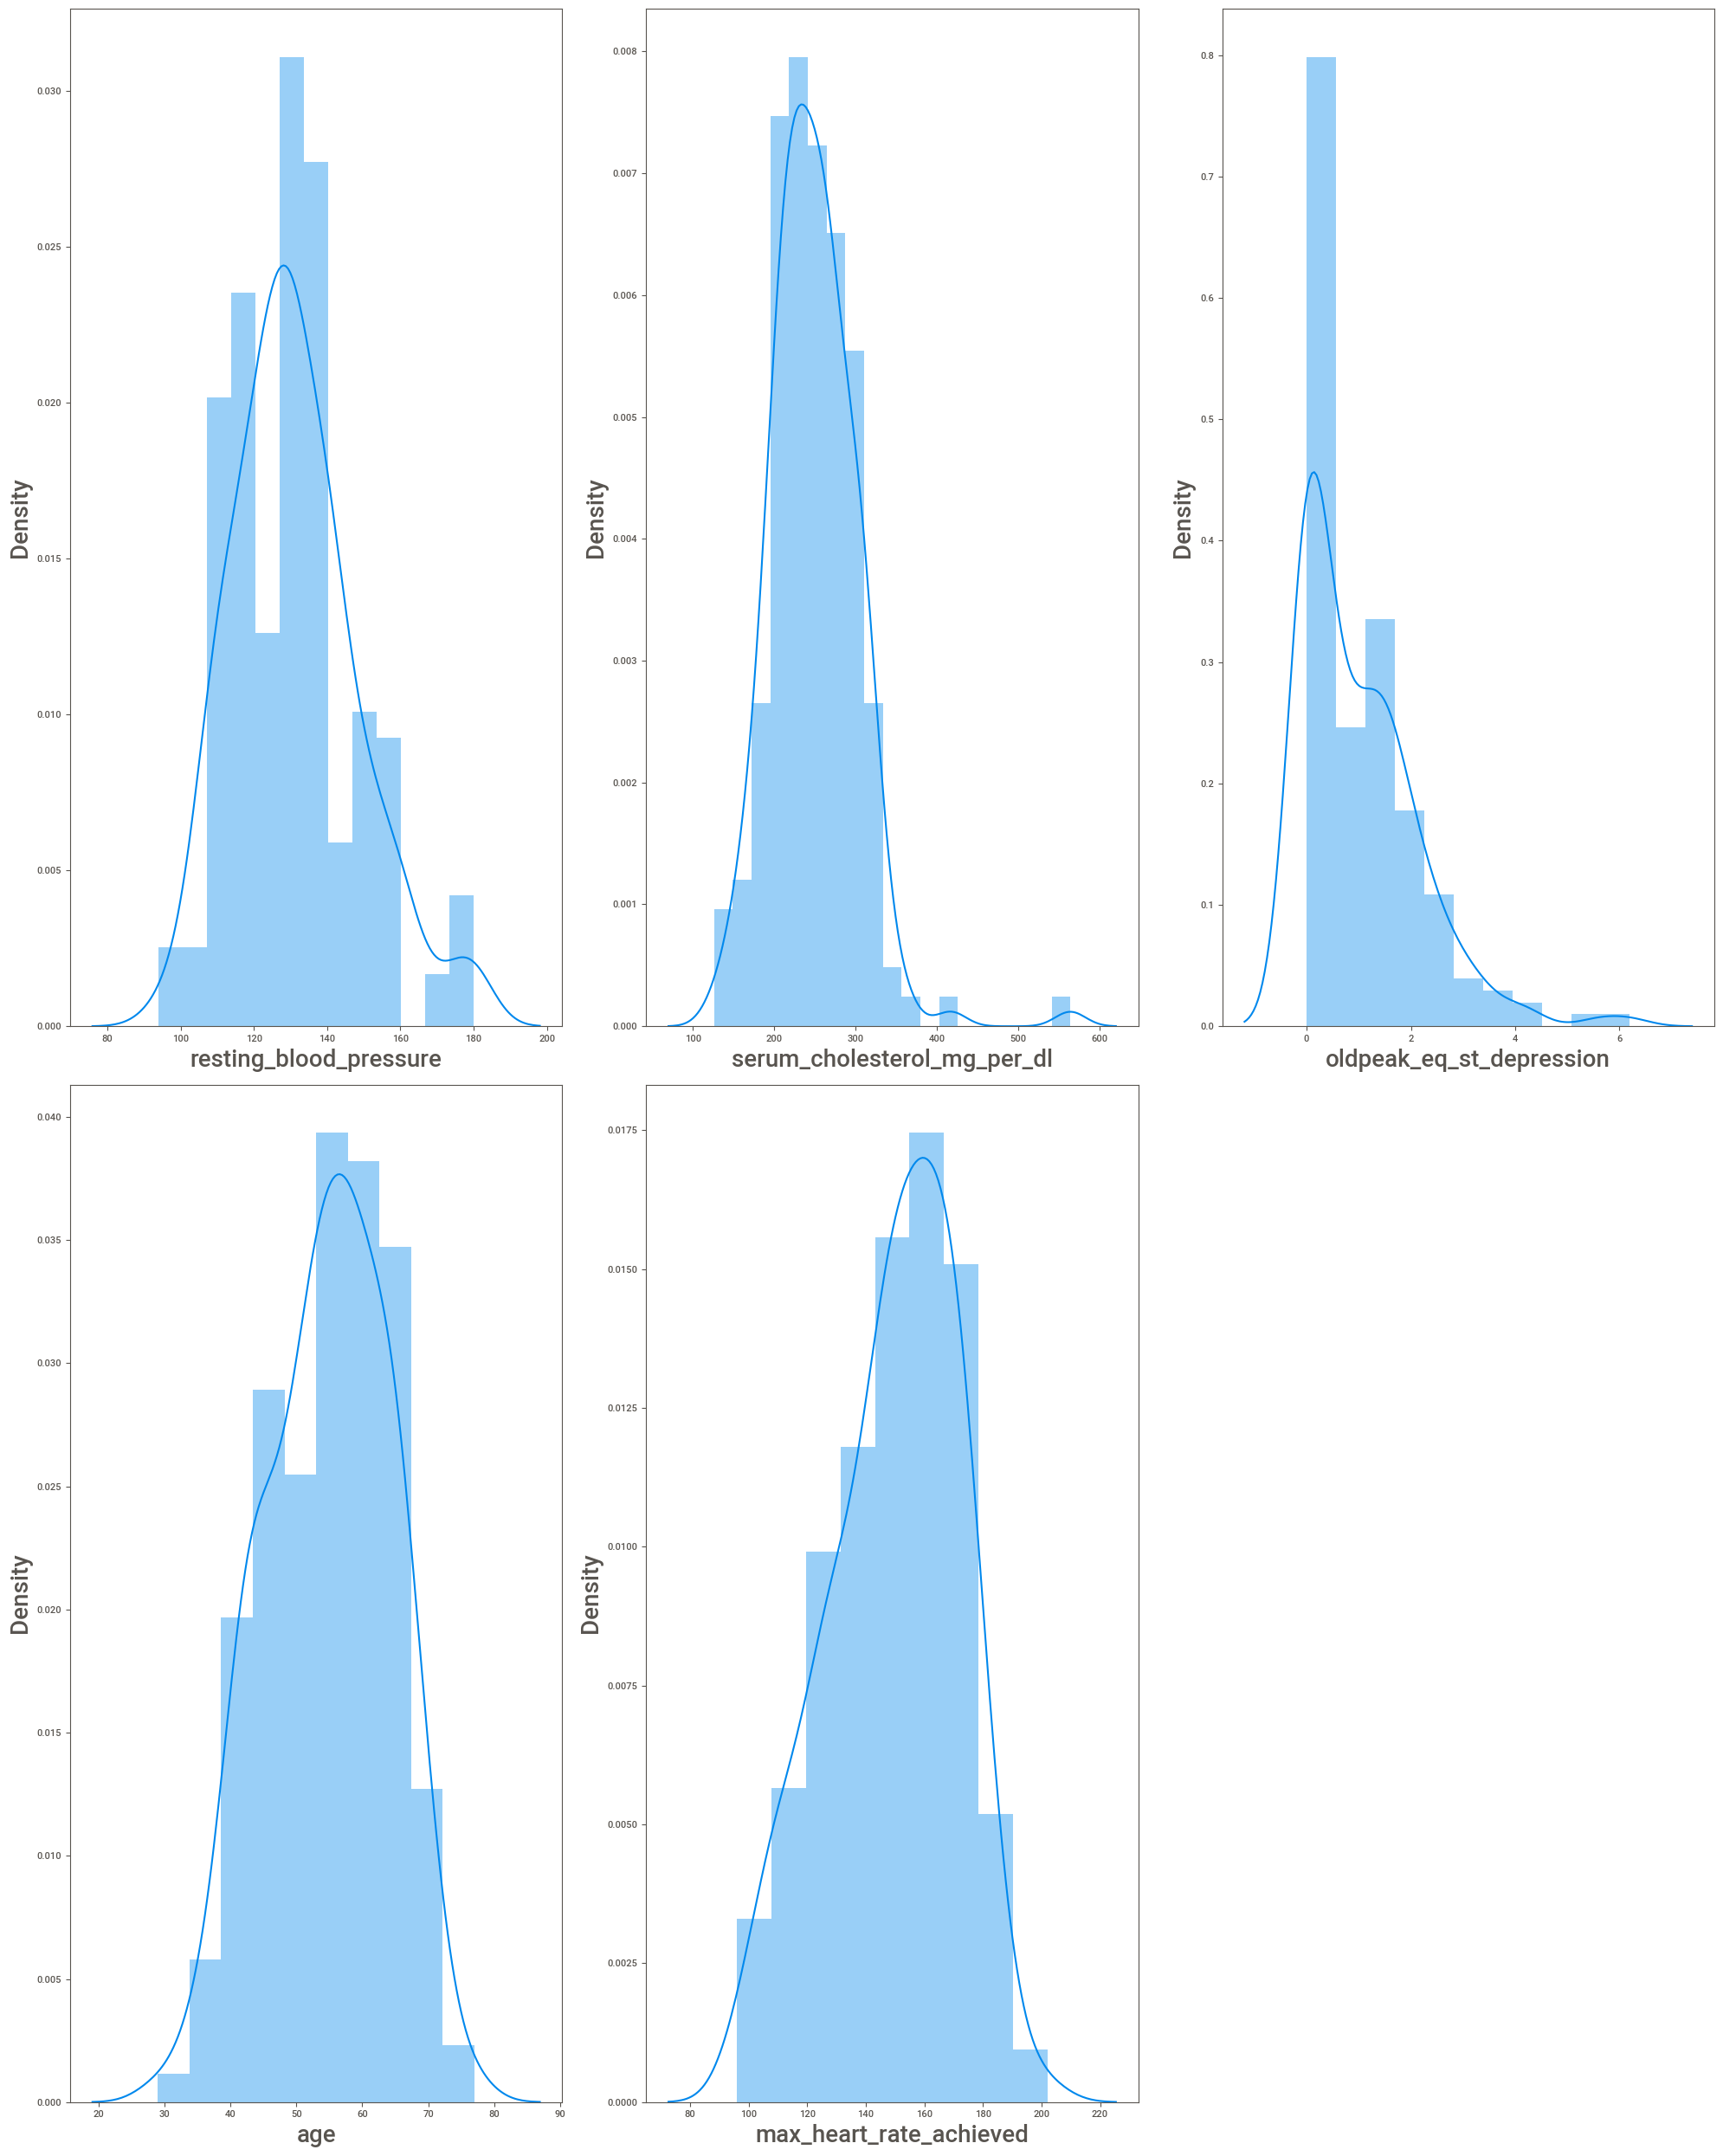

In [24]:
### Checking the dispersion of the continuous data
plt.figure(figsize=(20,25))
pltno=1
for column in df3:
    if pltno<=6:
        ax=plt.subplot(2,3,pltno)
        sns.distplot(x=df3[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
    pltno+=1
plt.tight_layout()

### Data Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [26]:
df.duplicated().sum()

0

In [27]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [28]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [29]:
df.drop(columns={'patient_id','num_major_vessels'},inplace=True)

In [30]:
## Ordinal Encoding

dict={'normal':0,'reversible_defect':1,'fixed_defect':2}
df.thal=df.thal.map(dict)
df['thal'].value_counts()

thal
0    98
1    74
2     8
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 5   resting_ekg_results                   180 non-null    int64  
 6   serum_cholesterol_mg_per_dl           180 non-null    int64  
 7   oldpeak_eq_st_depression              180 non-null    float64
 8   sex                                   180 non-null    int64  
 9   age                                   180 non-null    int64  
 10  max_heart_rate_achieved               180 non-null    int64  
 11  exercise_induced_an

In [32]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,2,270,4.2,1,59,145,0,0


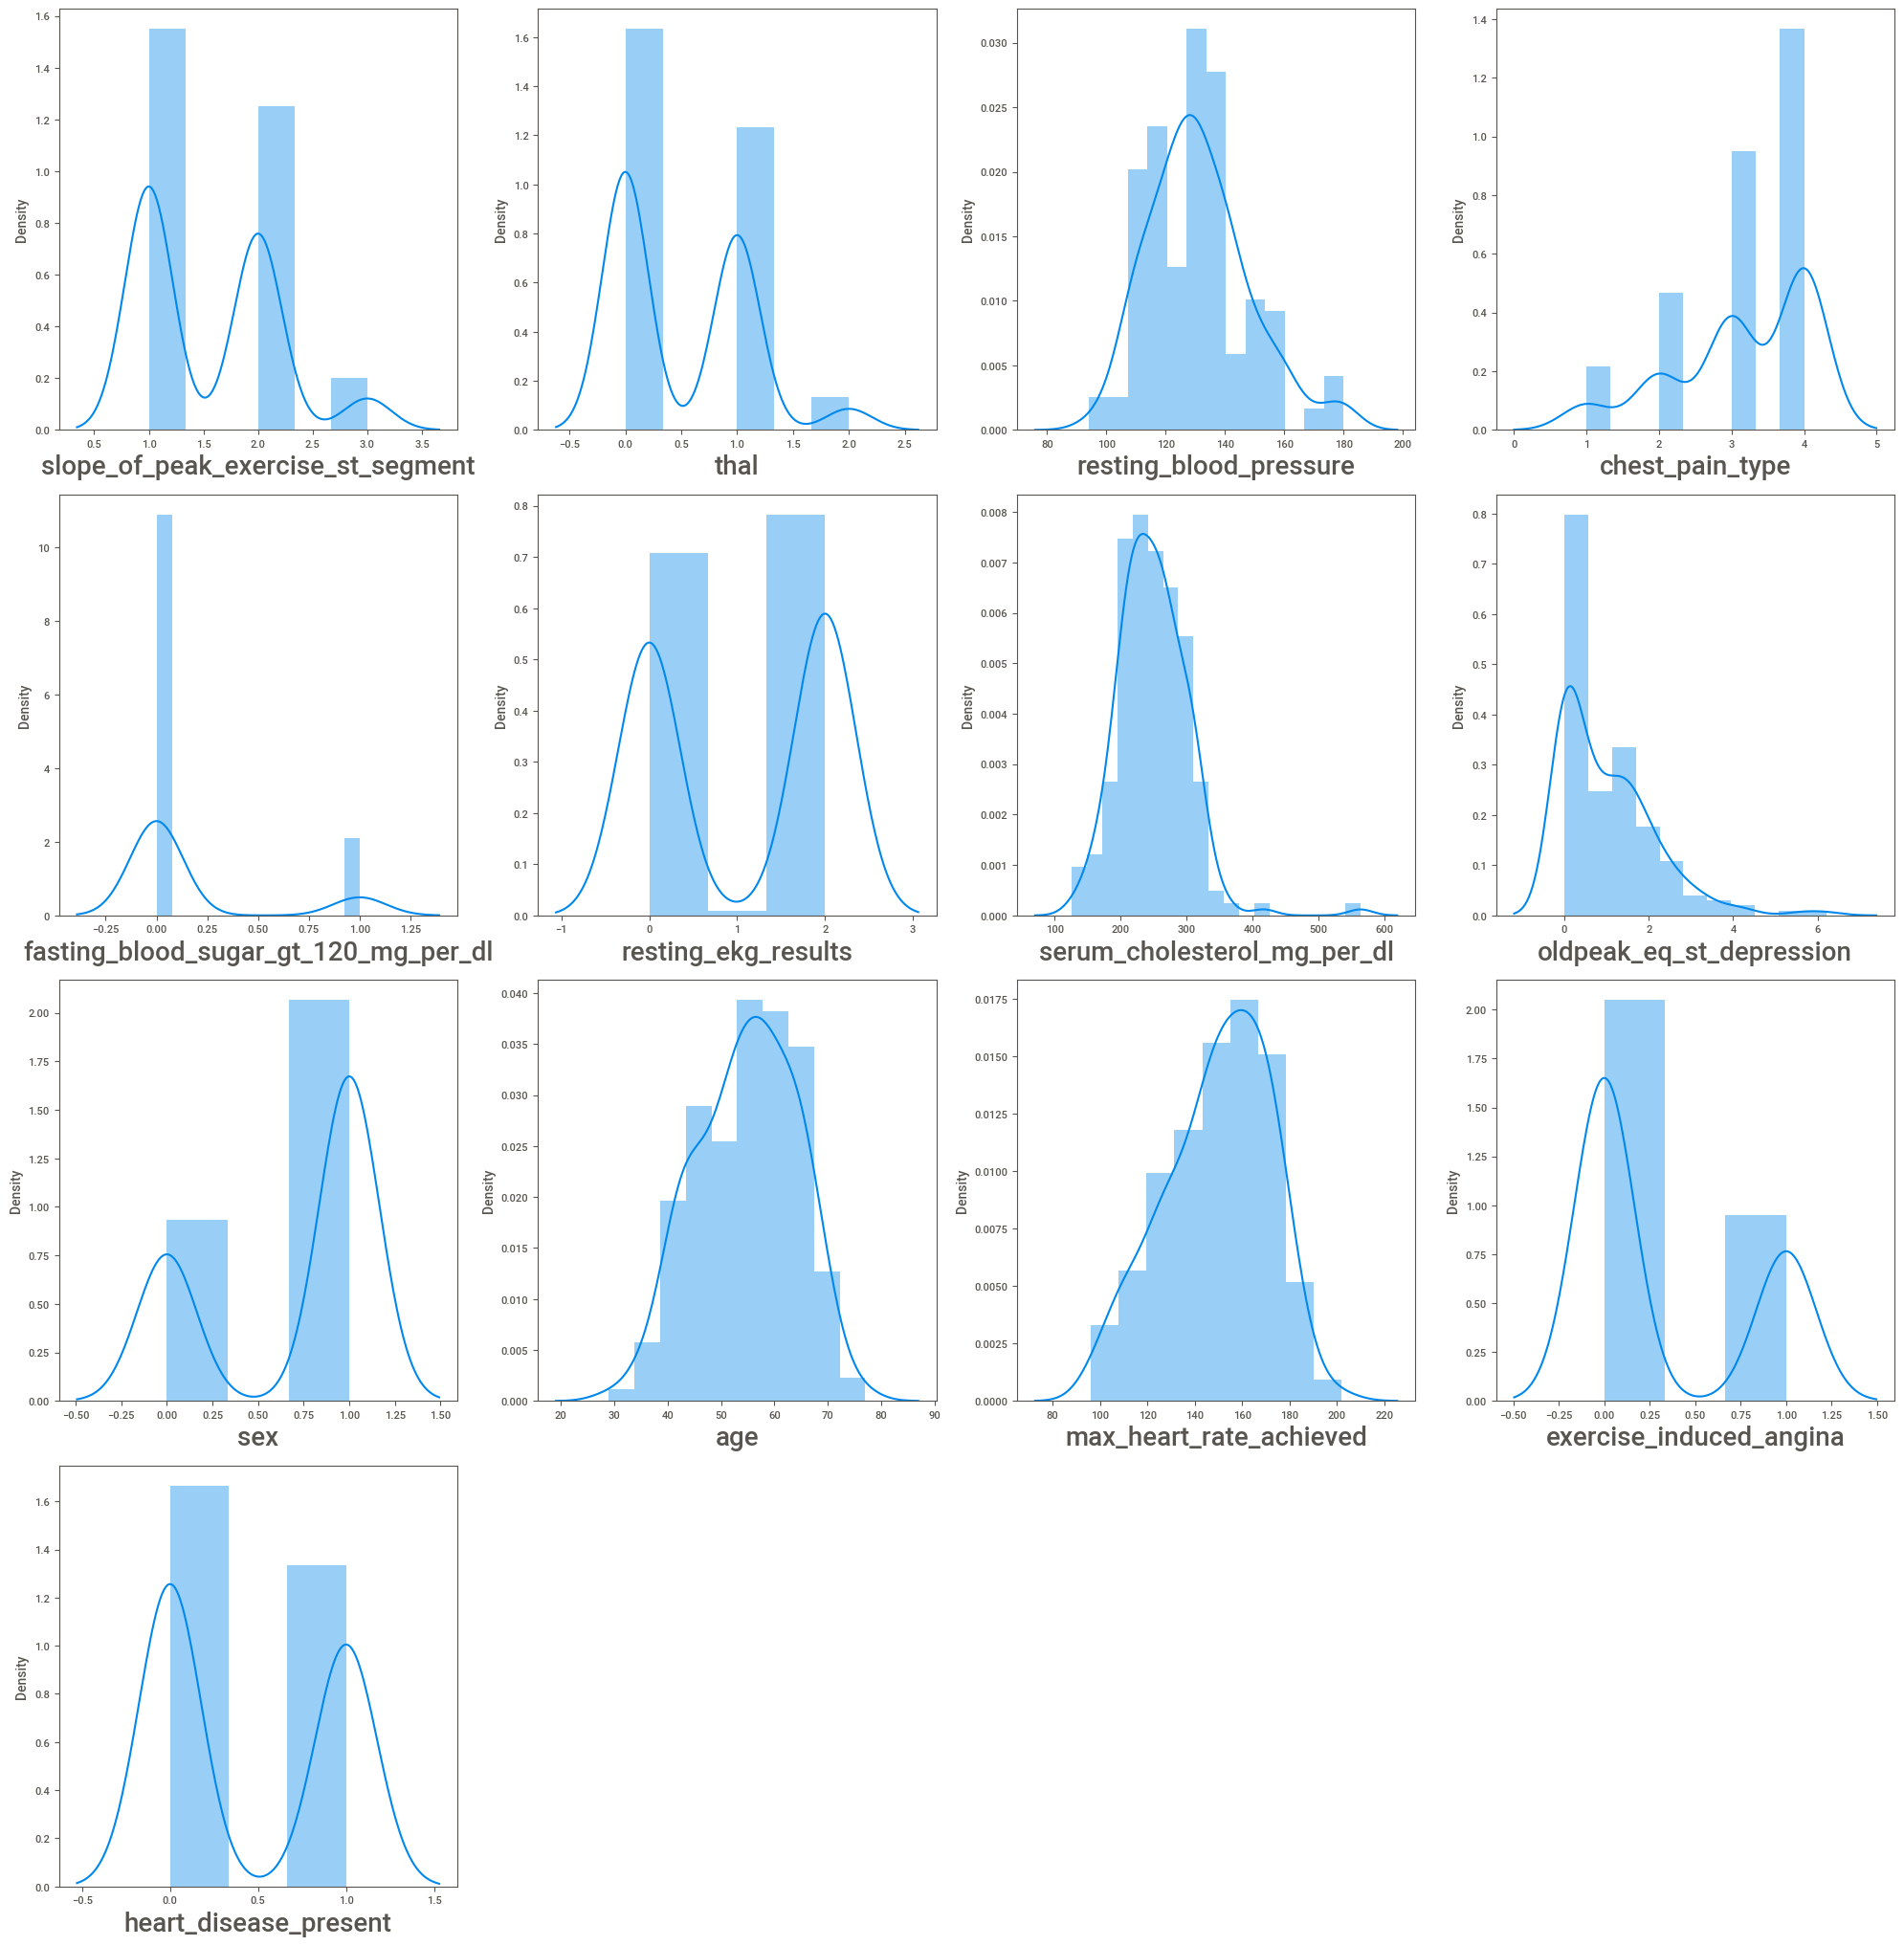

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
pltno=1
for column in df:
    if pltno<=21:
        ax=plt.subplot(5,4,pltno)
        sns.distplot(x=df[column])
        plt.xlabel(column,fontsize=20)
    pltno+=1
plt.tight_layout()

In [34]:
df.rename(columns={'slope_of_peak_exercise_st_segment':'slope','fasting_blood_sugar_gt_120_mg_per_dl':'fbs', 
                  'resting_blood_pressure':'restbps','chest_pain_type':'cp','resting_ekg_results':'restecg',
                  'serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak',
                  'exercise_induced_angina':'exang','max_heart_rate_achieved':'maxhrach'},inplace=True)

In [35]:
df.columns

Index(['slope', 'thal', 'restbps', 'cp', 'fbs', 'restecg', 'chol', 'oldpeak',
       'sex', 'age', 'maxhrach', 'exang', 'heart_disease_present'],
      dtype='object')

## checking and removing outlier

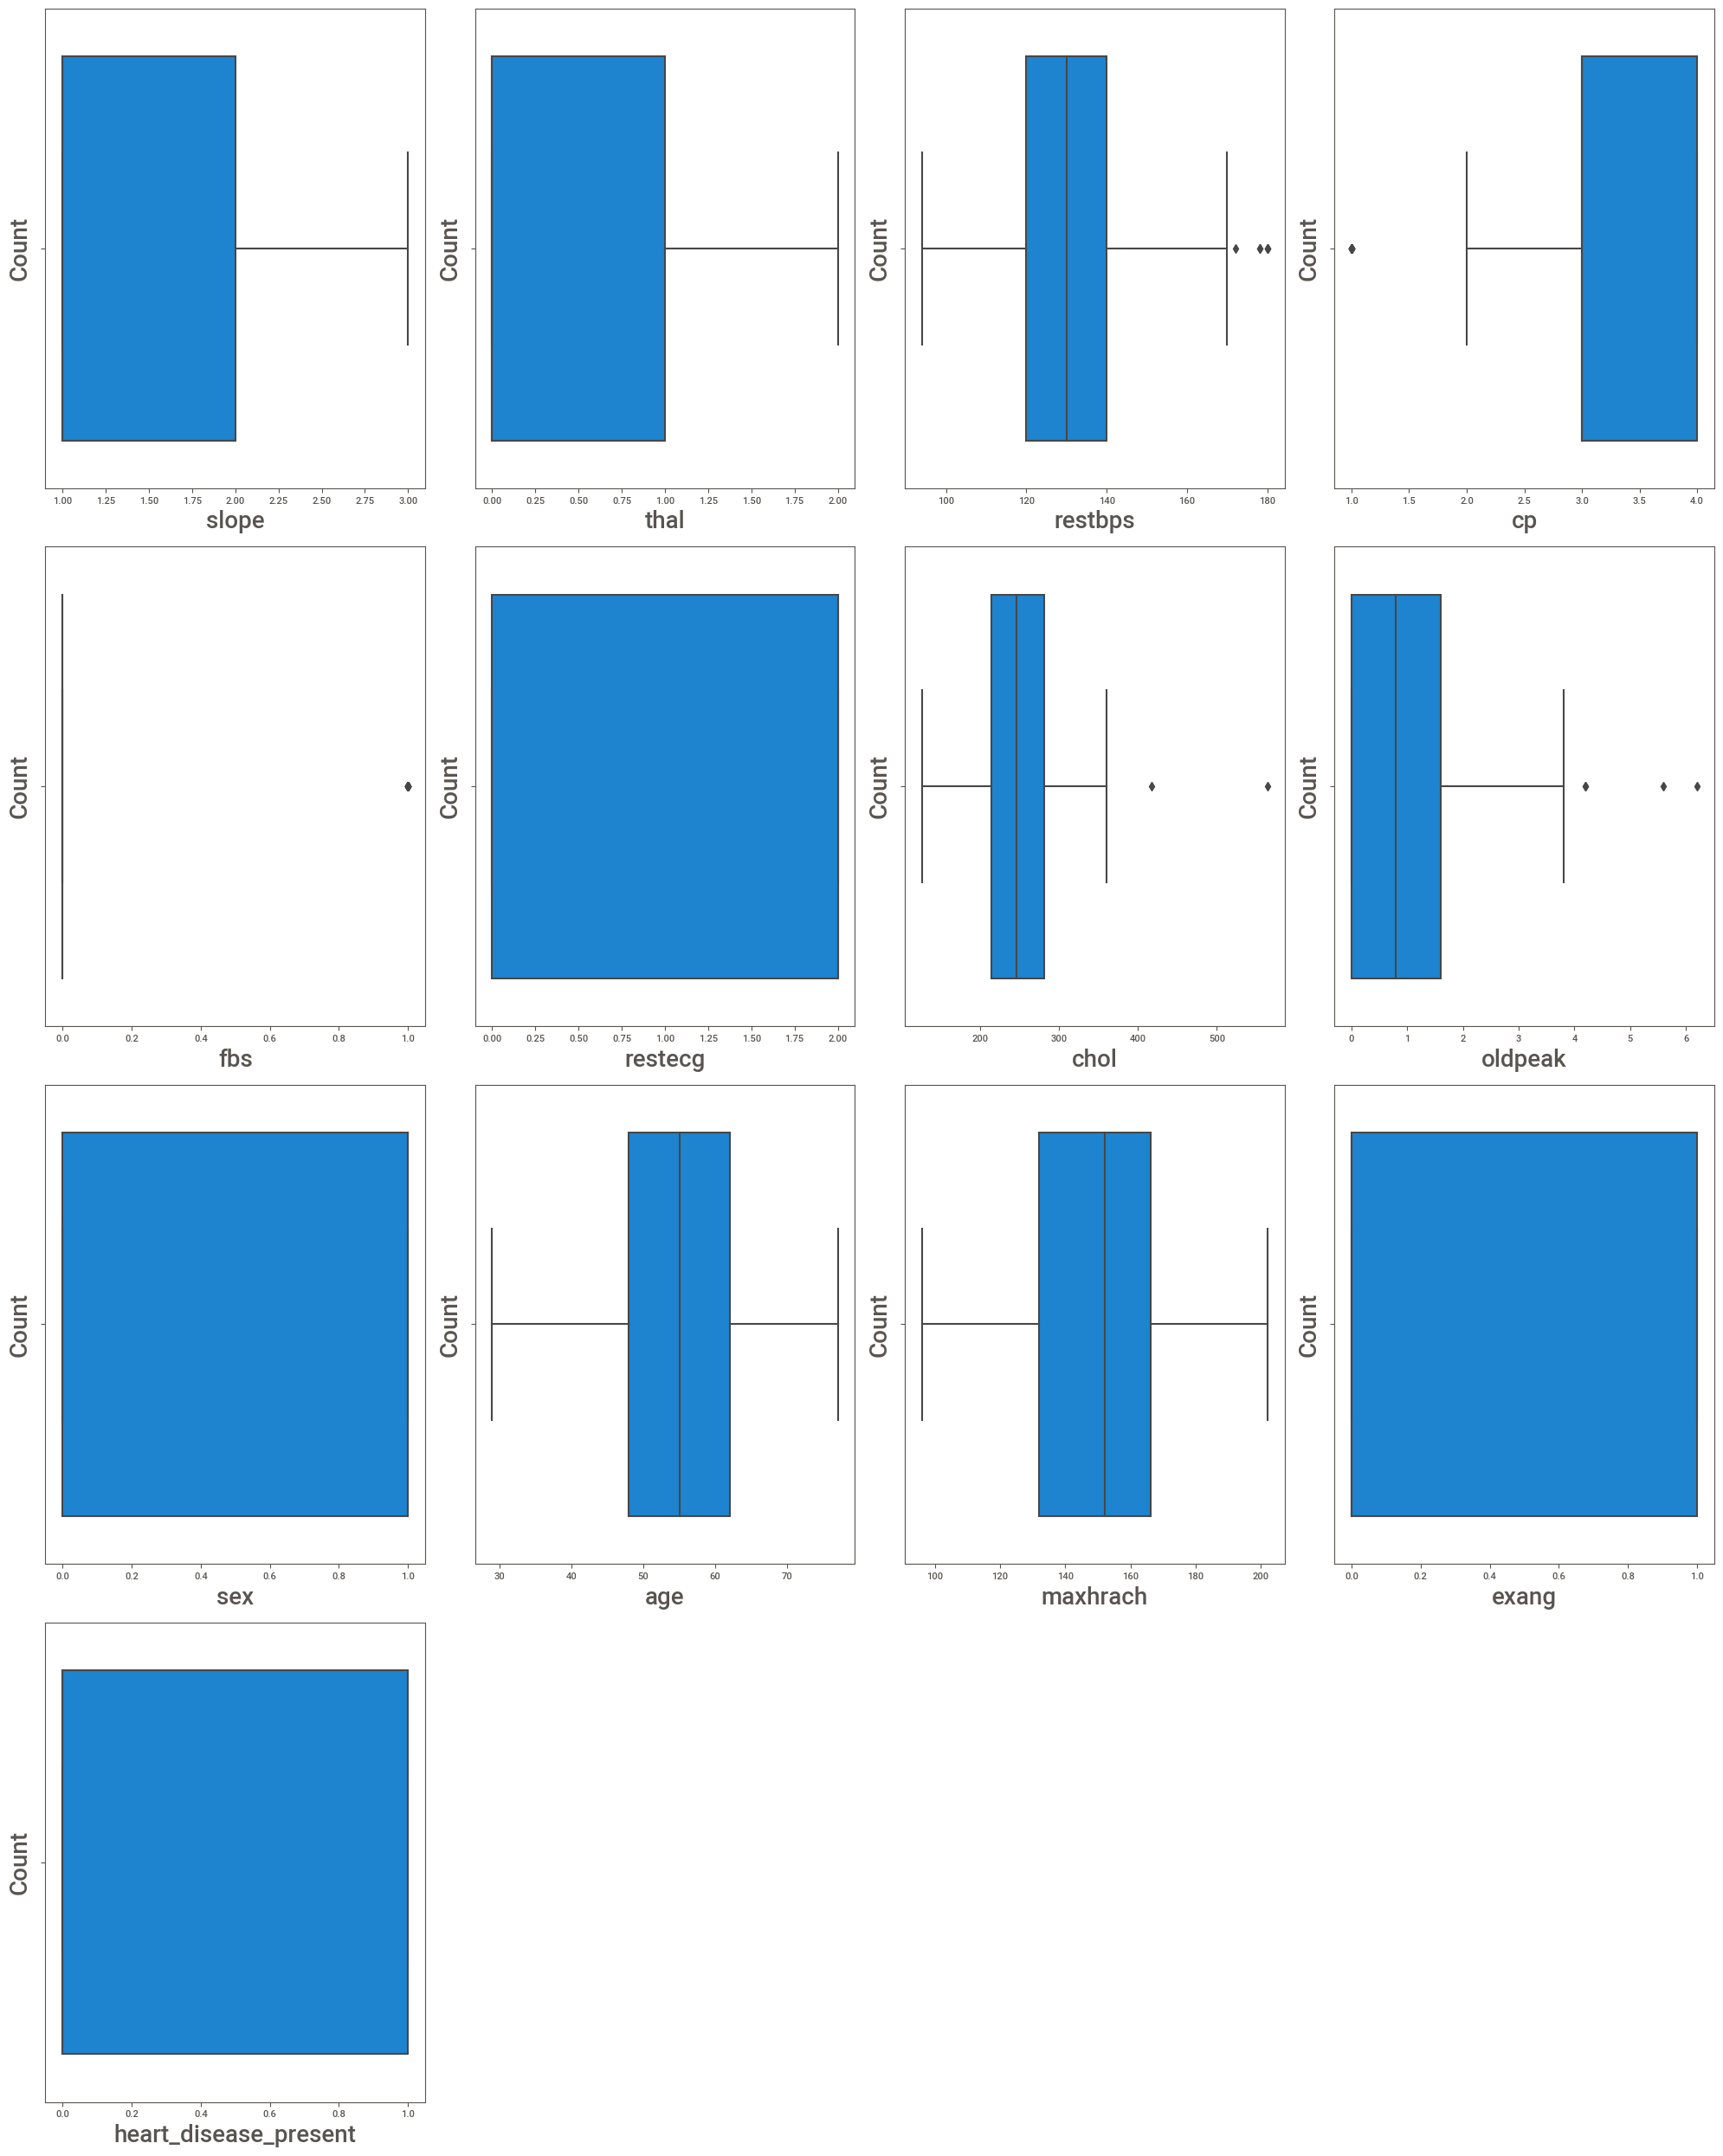

In [36]:
data2 = df[['slope', 'thal', 'restbps', 'cp', 'fbs', 'restecg', 'chol', 'oldpeak',
       'sex', 'age', 'maxhrach', 'exang', 'heart_disease_present']]

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   slope                  180 non-null    int64  
 1   thal                   180 non-null    int64  
 2   restbps                180 non-null    int64  
 3   cp                     180 non-null    int64  
 4   fbs                    180 non-null    int64  
 5   restecg                180 non-null    int64  
 6   chol                   180 non-null    int64  
 7   oldpeak                180 non-null    float64
 8   sex                    180 non-null    int64  
 9   age                    180 non-null    int64  
 10  maxhrach               180 non-null    int64  
 11  exang                  180 non-null    int64  
 12  heart_disease_present  180 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 18.4 KB


In [38]:
df.head()

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
0,1,0,128,2,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,2,270,4.2,1,59,145,0,0


### Chol

In [39]:
from scipy import stats
iqr=stats.iqr(df.chol,interpolation='midpoint')
print('Iqr :',iqr)
q1=df.chol.quantile(0.25)
q3=df.chol.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('min_limit=',min_limit)
print('max_limit=',max_limit)

Iqr : 68.0
min_limit= 111.75
max_limit= 383.25


In [40]:
df.loc[df['chol']>max_limit]

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
43,1,0,140,3,1,2,417,0.8,0,65,157,0,0
60,2,1,115,3,0,2,564,1.6,0,67,160,0,0


In [41]:
df.loc[df['chol']>max_limit,'chol']=np.median(df.chol)

#### resting bloop pressure

In [42]:
iqr=stats.iqr(df.restbps,interpolation='midpoint')
print('Iqr :',iqr)
q1=df.restbps.quantile(0.25)
q3=df.restbps.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('min_limit=',min_limit)
print('max_limit=',max_limit)

Iqr : 20.0
min_limit= 90.0
max_limit= 170.0


In [43]:
df.loc[df['restbps']>max_limit]

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
4,3,1,178,1,0,2,270.0,4.2,1,59,145,0,0
33,1,0,180,4,0,0,325.0,0.0,0,64,154,1,0
72,1,1,172,3,1,0,199.0,0.5,1,52,162,0,0
75,2,1,178,4,1,0,228.0,1.0,0,66,165,1,1
113,2,1,180,3,1,2,274.0,1.6,1,68,150,1,1
176,2,0,180,4,0,1,327.0,3.4,0,55,117,1,1


In [44]:
df.loc[df['restbps']>max_limit,'restbps']=np.median(df.restbps)

### oldpeak

In [45]:
iqr=stats.iqr(df.oldpeak,interpolation='midpoint')
print('Iqr :',iqr)
q1=df.oldpeak.quantile(0.25)
q3=df.oldpeak.quantile(0.75)
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr
print('min_limit=',min_limit)
print('max_limit=',max_limit)

Iqr : 1.6
min_limit= -2.4000000000000004
max_limit= 4.0


In [46]:
df.loc[df['oldpeak']>max_limit]

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
4,3,1,130,1,0,2,270.0,4.2,1,59,145,0,0
112,2,1,140,4,0,0,298.0,4.2,1,51,122,1,1
140,3,1,140,4,0,0,217.0,5.6,1,55,111,1,1
162,3,1,160,4,0,2,164.0,6.2,0,62,145,0,1


In [47]:
df.loc[df['oldpeak']>max_limit,'oldpeak']=np.median(df.oldpeak)

#### Final check for outliers

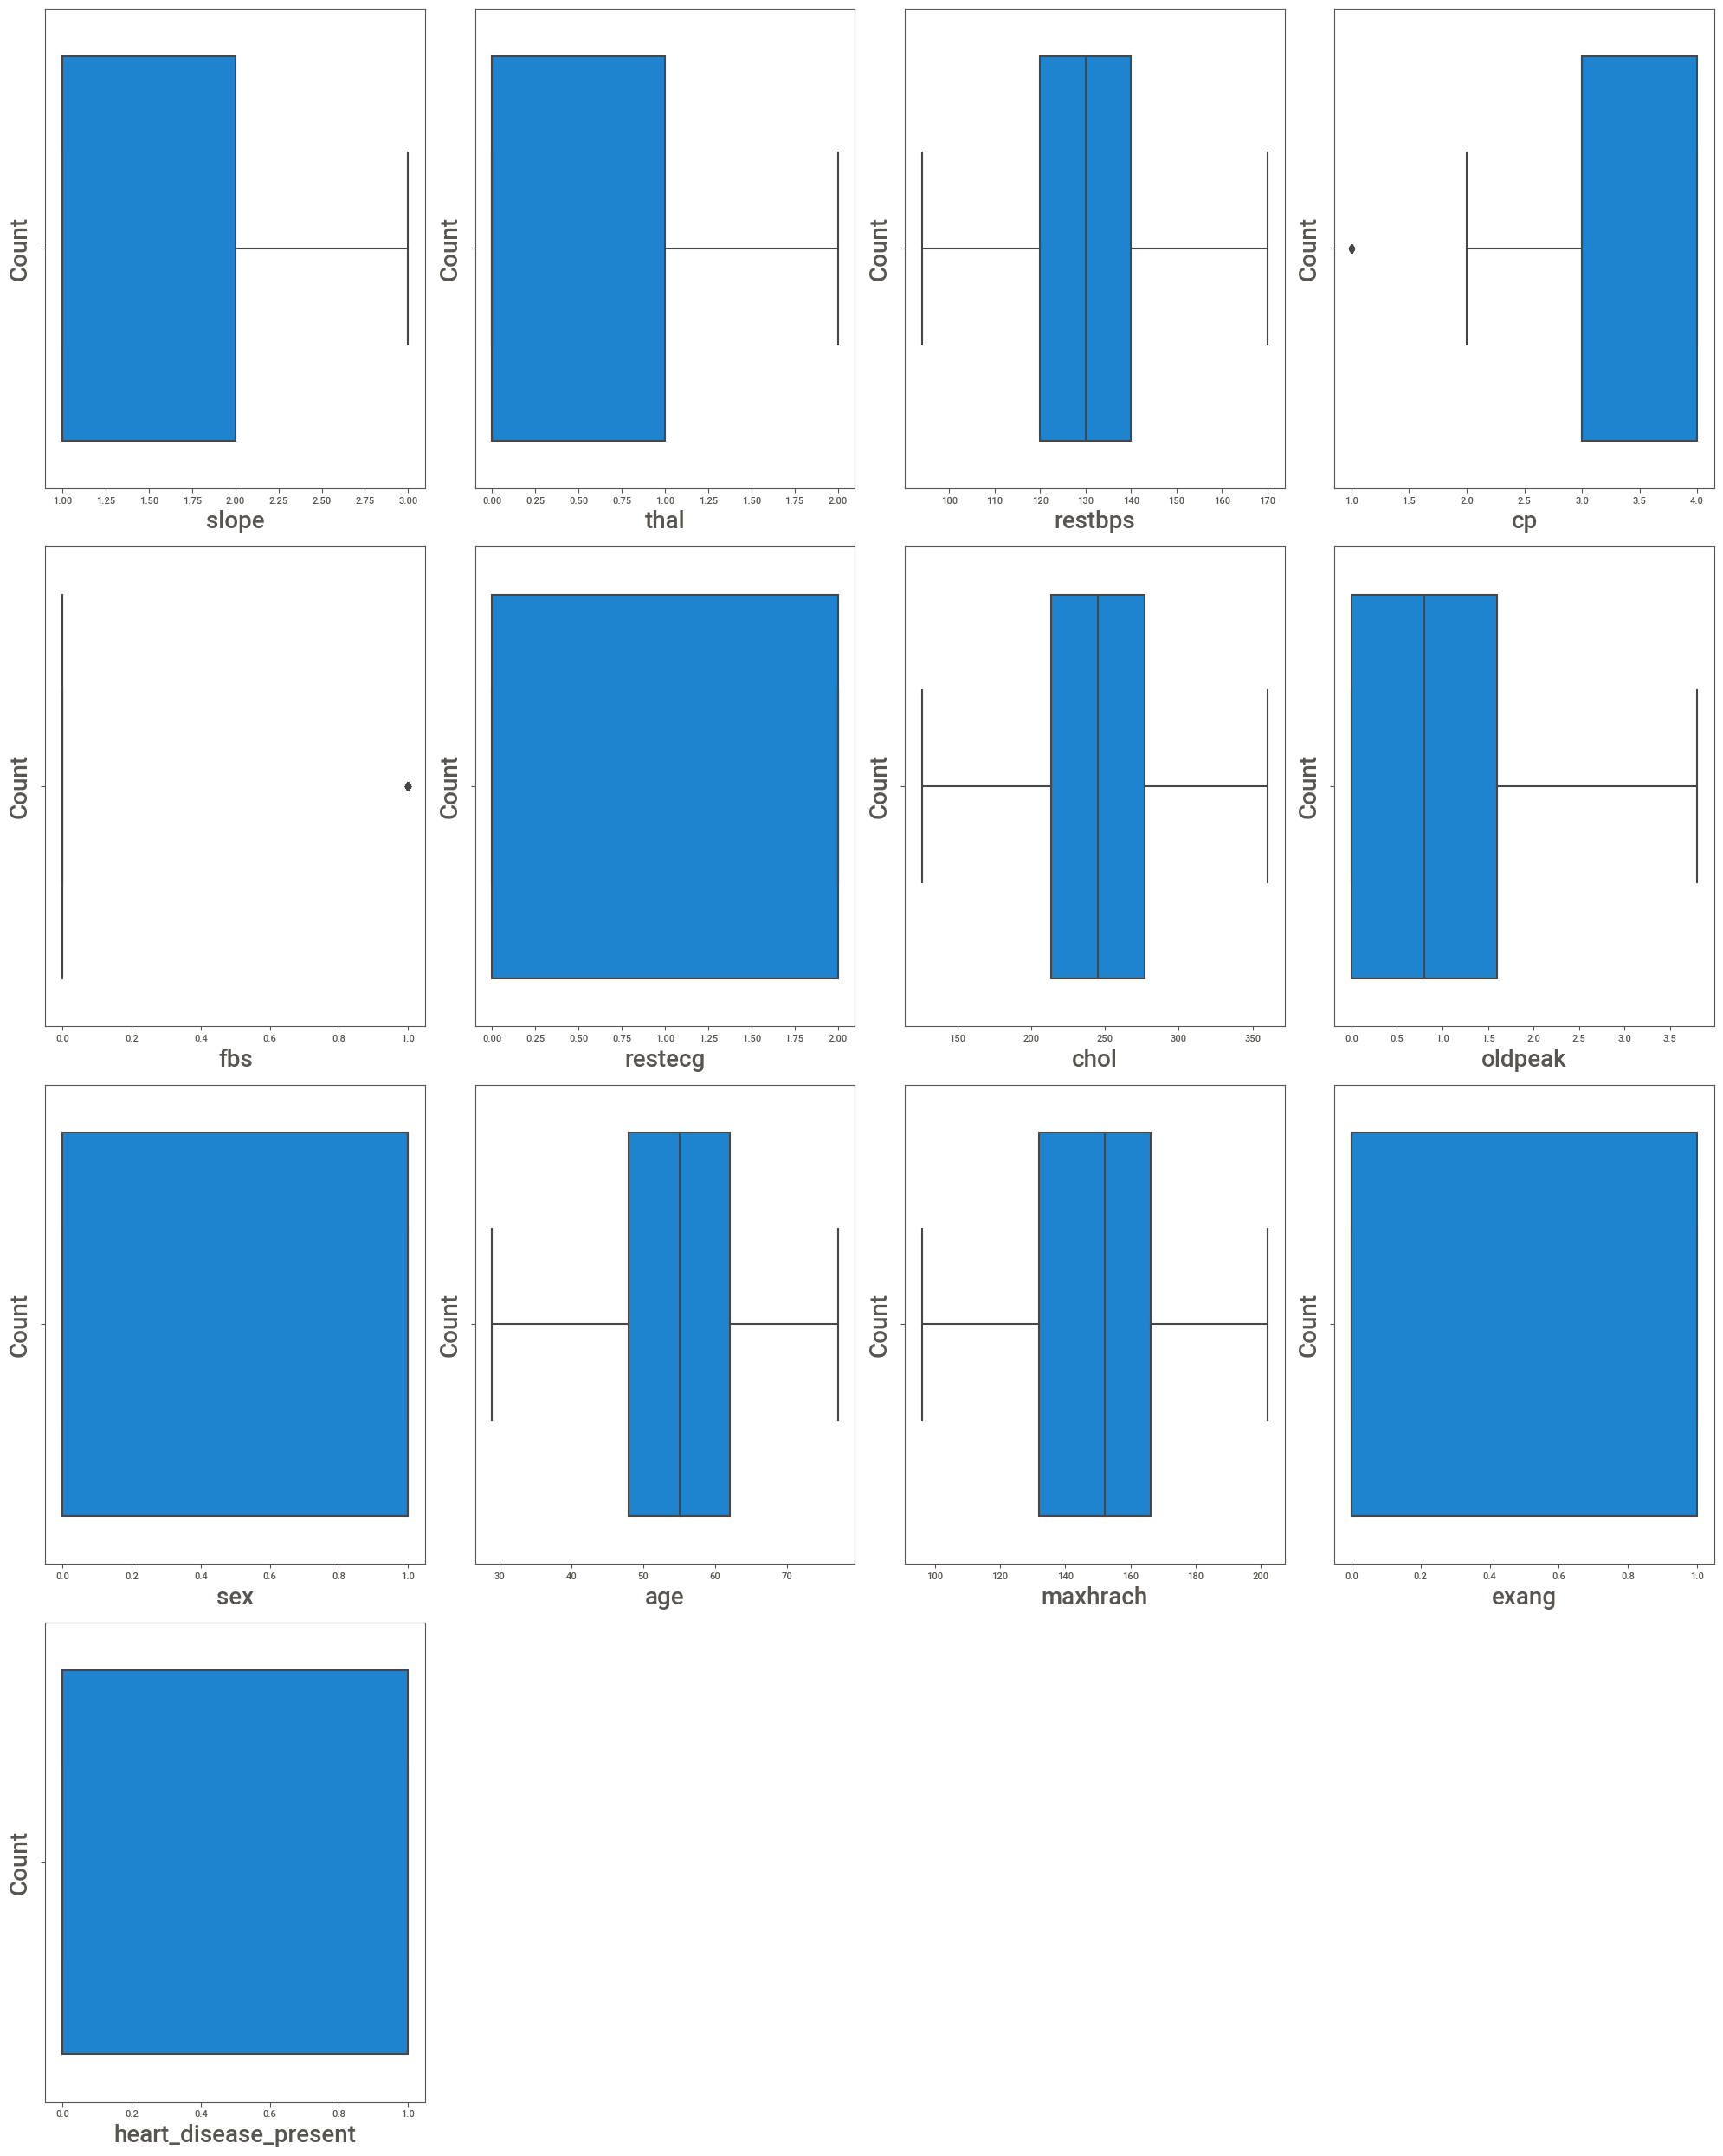

In [48]:
data2 = df[['slope', 'thal', 'restbps', 'cp', 'fbs', 'restecg', 'chol', 'oldpeak',
       'sex', 'age', 'maxhrach', 'exang', 'heart_disease_present']]

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Feature engg

In [49]:
df.corr()

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
slope,1.000000,0.317019,0.061536,0.121207,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.317019,1.000000,0.122475,0.254939,0.064897,-0.004791,-0.074096,0.279462,0.412284,0.067663,-0.278681,0.317990,0.460933
restbps,0.061536,0.122475,1.000000,-0.037038,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
cp,0.121207,0.254939,-0.037038,1.000000,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829
fbs,0.050199,0.064897,0.096842,-0.088992,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
restecg,0.172191,-0.004791,0.113544,0.033379,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
chol,-0.047307,-0.074096,0.163281,0.081077,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak,0.535583,0.279462,0.110505,0.070715,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253
sex,0.093340,0.412284,-0.016618,0.086057,0.066010,0.045786,-0.087374,0.121071,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.067663,0.259479,0.085001,0.176101,0.126856,0.200082,0.202029,-0.148997,1.000000,-0.394630,0.081811,0.138255


<Axes: >

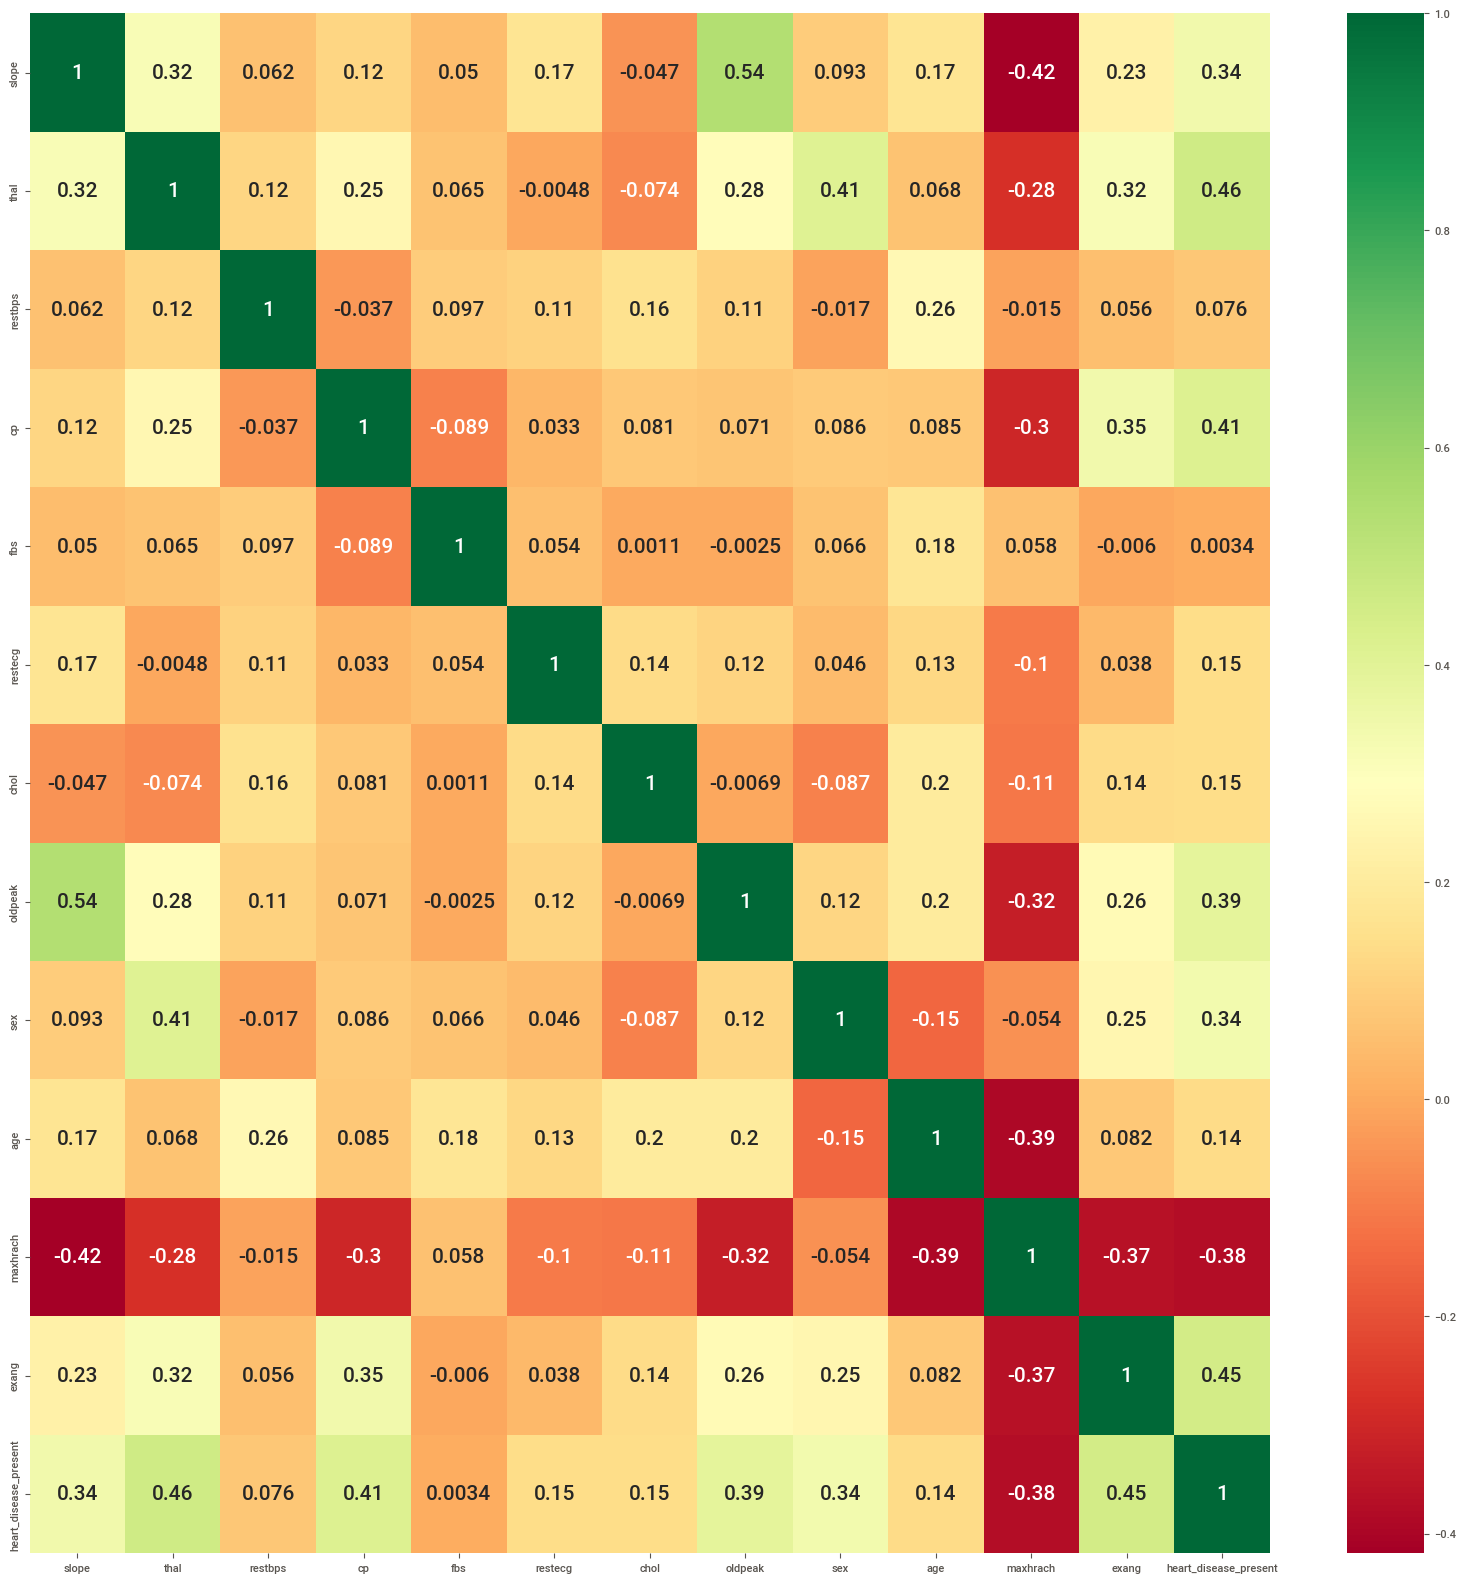

In [50]:
## Checking correlation

plt.figure(figsize=(20, 20))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [51]:
df4=df.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   slope                  180 non-null    int64  
 1   thal                   180 non-null    int64  
 2   restbps                180 non-null    int64  
 3   cp                     180 non-null    int64  
 4   fbs                    180 non-null    int64  
 5   restecg                180 non-null    int64  
 6   chol                   180 non-null    float64
 7   oldpeak                180 non-null    float64
 8   sex                    180 non-null    int64  
 9   age                    180 non-null    int64  
 10  maxhrach               180 non-null    int64  
 11  exang                  180 non-null    int64  
 12  heart_disease_present  180 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 18.4 KB


In [52]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
columns_to_scale=['age','restbps','chol','oldpeak','maxhrach']
df4[columns_to_scale]=sc.fit_transform(df4[columns_to_scale])

In [53]:
df4.head()

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
0,1,0,-0.117432,2,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0,0
1,2,0,-1.352755,3,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0,0
2,1,0,-0.323319,4,0,2,1.270341,-0.985690,1,2.383654,0.568884,1,1
3,1,1,1.529666,4,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0,1
4,3,1,0.019826,1,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0,0


In [54]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   slope                  180 non-null    int64  
 1   thal                   180 non-null    int64  
 2   restbps                180 non-null    float64
 3   cp                     180 non-null    int64  
 4   fbs                    180 non-null    int64  
 5   restecg                180 non-null    int64  
 6   chol                   180 non-null    float64
 7   oldpeak                180 non-null    float64
 8   sex                    180 non-null    int64  
 9   age                    180 non-null    float64
 10  maxhrach               180 non-null    float64
 11  exang                  180 non-null    int64  
 12  heart_disease_present  180 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 18.4 KB


### Save Pre-process Data

In [55]:
df4.to_csv('Heart_Diesease_Prediction_preprocessed_data.csv')
data= pd.read_csv('Heart_Diesease_Prediction_preprocessed_data.csv')
data.head()

,Unnamed: 0,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
0,0,1,0,-0.117432,2,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0,0
1,1,2,0,-1.352755,3,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0,0
2,2,1,0,-0.323319,4,0,2,1.270341,-0.985690,1,2.383654,0.568884,1,1
3,3,1,1,1.529666,4,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0,1
4,4,3,1,0.019826,1,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0,0


In [56]:
# import preprocessed data
data= pd.read_csv('Heart_Diesease_Prediction_preprocessed_data.csv')
data.head()

,Unnamed: 0,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
0,0,1,0,-0.117432,2,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0,0
1,1,2,0,-1.352755,3,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0,0
2,2,1,0,-0.323319,4,0,2,1.270341,-0.985690,1,2.383654,0.568884,1,1
3,3,1,1,1.529666,4,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0,1
4,4,3,1,0.019826,1,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0,0


In [57]:
l1 = ['Unnamed: 0']
data.drop(l1,axis=1,inplace=True)

In [58]:
data.head()

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang,heart_disease_present
0,1,0,-0.117432,2,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0,0
1,2,0,-1.352755,3,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0,0
2,1,0,-0.323319,4,0,2,1.270341,-0.985690,1,2.383654,0.568884,1,1
3,1,1,1.529666,4,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0,1
4,3,1,0.019826,1,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0,0


# Model creation & Evaluation

In [59]:
data.columns

Index(['slope', 'thal', 'restbps', 'cp', 'fbs', 'restecg', 'chol', 'oldpeak',
       'sex', 'age', 'maxhrach', 'exang', 'heart_disease_present'],
      dtype='object')

In [60]:
# Defining X and Y
X = data.iloc[:,:-1]
y = data.heart_disease_present

In [61]:
X

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang
0,1,0,-0.117432,2,0,2,1.358696,-0.985690,1,-1.053964,0.932485,0
1,2,0,-1.352755,3,0,0,-0.717635,0.736875,0,-0.087134,0.387084,0
2,1,0,-0.323319,4,0,2,1.270341,-0.985690,1,2.383654,0.568884,1
3,1,1,1.529666,4,0,0,-0.518837,-0.985690,1,-1.591092,1.432436,0
4,3,1,0.019826,1,0,2,0.519328,-0.124407,1,0.449994,-0.203768,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,-0.323319,4,1,0,0.165910,-0.770369,1,1.309398,0.614334,0
176,2,0,0.019826,4,0,1,1.778380,2.674760,0,0.020291,-1.476372,1
177,2,1,-0.323319,3,0,0,1.380785,0.952195,1,0.987122,-0.840070,1
178,1,0,-0.391948,3,1,0,0.187999,-0.985690,1,-0.731688,1.159736,0


In [62]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

#### SMOTE

In [63]:
## Balncing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
X_smote,y_smote=sm.fit_resample(X,y)#applying sampling on target variable
print("Actual",Counter(y))# checking count for each class
print("After smote",Counter(y_smote))# checking count after sampling for  each class

Actual Counter({0: 100, 1: 80})
After smote Counter({0: 100, 1: 100})


#### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.25,random_state=42)

In [65]:
X_train

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang
114,1,0,-1.215497,3,0,0,0.077556,-0.985690,1,-1.483667,1.341536,0
173,1,1,0.706117,4,0,0,1.159898,0.736875,1,-0.409411,1.068835,1
5,1,0,0.019826,3,0,0,-1.468648,-0.985690,1,-1.376241,0.023483,0
126,2,0,-1.901788,4,0,2,0.408885,-0.339728,0,-1.376241,-1.249121,0
117,1,1,-1.352755,4,0,2,-1.645357,-0.985690,1,-1.483667,0.387084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,1.392407,3,0,2,-0.320040,0.736875,1,-0.087134,0.705234,0
14,2,1,-0.666464,1,0,0,-0.342128,3.105401,1,-1.805943,1.477887,1
92,1,0,0.362971,3,1,0,1.270341,-0.985690,0,-0.087134,0.932485,0
179,1,0,2.078698,3,0,0,-1.004787,-0.985690,0,-0.087134,0.614334,0


In [66]:
X_train.shape

(150, 12)

In [67]:
y_train

114    0
173    1
5      0
126    0
117    1
      ..
106    0
14     1
92     0
179    0
102    1
Name: heart_disease_present, Length: 150, dtype: int64

In [68]:
y_train.shape

(150,)

In [69]:
X_test

,slope,thal,restbps,cp,fbs,restecg,chol,oldpeak,sex,age,maxhrach,exang
95,1,1,-0.803723,3,0,0,0.673949,0.090913,1,1.416824,0.068933,0
15,2,1,0.980633,4,0,2,-1.026876,-0.016747,1,-0.516836,-1.067320,1
30,2,0,0.019826,3,0,2,-0.717635,1.167516,1,-1.483667,0.841585,0
158,1,0,-0.666464,3,0,0,-0.452571,-0.985690,1,-1.161390,0.887035,0
128,3,1,1.049262,4,0,0,-1.601180,1.813478,1,1.631675,-1.112771,1
115,1,0,0.706117,3,1,2,-0.783901,-0.985690,1,0.342568,0.705234,0
69,2,1,-0.666464,3,0,0,-1.291939,1.167516,1,-0.624262,-0.476469,0
170,1,1,1.392407,4,0,2,0.519328,-0.124407,1,0.342568,-1.749072,1
174,1,0,0.706117,4,0,0,-0.165419,0.306234,1,-0.087134,0.477984,0
45,1,1,-0.391948,2,0,0,0.320531,-0.662709,1,0.235143,-0.385569,0


In [70]:
X_test.shape

(50, 12)

In [71]:
y_test

95     0
15     1
30     0
158    0
128    1
115    0
69     1
170    1
174    0
45     1
66     1
182    1
165    0
78     1
186    1
177    1
56     1
152    1
82     1
68     0
124    1
16     0
148    1
93     1
65     1
60     0
84     0
67     0
125    0
132    0
9      0
18     0
55     0
75     1
150    0
104    0
135    0
137    1
164    0
76     0
79     1
197    1
38     0
24     0
122    0
195    1
29     0
19     1
143    1
86     0
Name: heart_disease_present, dtype: int64

In [72]:
y_test.shape

(50,)

## 1.)SVM (SUPPORT VECTOR MACHINE MODEL)

In [73]:
# IMPORTING LIBREARY
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [74]:
train_pred=svc.predict(X_train)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [76]:
acc = accuracy_score(train_pred,y_train)
acc

0.88

In [77]:
F1 = f1_score(train_pred,y_train)
F1

0.88

In [78]:
RECALL = recall_score(train_pred,y_train)
RECALL

0.8918918918918919

In [79]:
PRECISION = precision_score(train_pred,y_train)
PRECISION

0.868421052631579

In [80]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.89      0.87      0.88        76

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [81]:
#predicting output for x test
y_pred=svc.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0]
(50,)


In [82]:
y_test

95     0
15     1
30     0
158    0
128    1
115    0
69     1
170    1
174    0
45     1
66     1
182    1
165    0
78     1
186    1
177    1
56     1
152    1
82     1
68     0
124    1
16     0
148    1
93     1
65     1
60     0
84     0
67     0
125    0
132    0
9      0
18     0
55     0
75     1
150    0
104    0
135    0
137    1
164    0
76     0
79     1
197    1
38     0
24     0
122    0
195    1
29     0
19     1
143    1
86     0
Name: heart_disease_present, dtype: int64

In [83]:
acc1 =accuracy_score(y_test,y_pred)
acc1

0.76

In [84]:
f1=f1_score(y_test,y_pred, average='weighted')
f1

0.76

In [85]:
recall = recall_score(y_test,y_pred)
recall

0.7916666666666666

In [86]:
precision = precision_score(y_test,y_pred)
precision

0.7307692307692307

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.73      0.79      0.76        24

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



In [88]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0

[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0

[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=6

[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=7

[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=8

[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [89]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'random_state': 1}


In [90]:
clf=SVC(C=50,gamma=0.001,random_state=1)

In [91]:
clf.fit(X_smote,y_smote)

SVC(C=50, gamma=0.001, random_state=1)

In [92]:
y_clf=clf.predict(X_test)

In [93]:
f1_score(y_test,y_clf,average='weighted')

0.8

In [94]:
accuracy_score(y_test,y_clf)

0.8

In [95]:
recall_score(y_test,y_clf)

0.7916666666666666

In [96]:
precision_score(y_test,y_clf)

0.7916666666666666

In [97]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.79      0.79      0.79        24

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



## 2.)XGB BOOSTING

In [98]:
## Installing XGB library
!pip3 install xgboost

In [99]:
## Model Creation
from xgboost import XGBClassifier # importing the model library
xgb_r=XGBClassifier() # object creation
xgb_r.fit(X_train,y_train) # fitting the data
y_hat=xgb_r.predict(X_test) #predicting the price

In [100]:
y_hat

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0])

In [101]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [102]:
accuracy_score(y_test,y_hat)

0.78

In [103]:
f1_score(y_test,y_hat)

0.7659574468085107

In [104]:
recall_score(y_test,y_hat)

0.75

In [105]:
precision_score(y_test,y_hat)

0.782608695652174

In [106]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.78      0.75      0.77        24

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



#### Hyper parameter tunning in XG bost

In [107]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]

             }


XGB=XGBClassifier(random_state=42,verbosity=2)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rcv.fit(X_train, y_train) # training data on randomsearch cv
cv_best_params = rcv.best_params_# it will give you best parameters
print(f"Best paramters: {cv_best_params})") # printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 12.8, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.8})


In [108]:
XGB2=XGBClassifier(reg_lambda=12.8,reg_alpha=0.1,n_estimators=150,max_depth=5,learning_rate=0.1,gamma=0,random_state=42)
XGB2.fit(X_train, y_train)#training
y_predict=XGB2.predict(X_test)#testing

In [109]:
y_train_pred=XGB2.predict(X_train)

In [110]:
accuracy_score(y_test,y_predict)

0.78

In [111]:
f1_score(y_test,y_predict)

0.7659574468085107

In [112]:
recall_score(y_test,y_predict)

0.75

In [113]:
precision_score(y_test,y_predict)

0.782608695652174

In [114]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.78      0.75      0.77        24

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



## 3.) LOGISTIC REGRESSION

In [115]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [116]:
# Prediction
y_pred=clf.predict(X_test)

In [117]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [118]:
y_test

95     0
15     1
30     0
158    0
128    1
115    0
69     1
170    1
174    0
45     1
66     1
182    1
165    0
78     1
186    1
177    1
56     1
152    1
82     1
68     0
124    1
16     0
148    1
93     1
65     1
60     0
84     0
67     0
125    0
132    0
9      0
18     0
55     0
75     1
150    0
104    0
135    0
137    1
164    0
76     0
79     1
197    1
38     0
24     0
122    0
195    1
29     0
19     1
143    1
86     0
Name: heart_disease_present, dtype: int64

In [119]:
y_pred_prob=clf.predict_proba(X_test)

In [120]:
y_pred_prob

array([[0.31116714, 0.68883286],
       [0.07982355, 0.92017645],
       [0.44967297, 0.55032703],
       [0.89781588, 0.10218412],
       [0.0340607 , 0.9659393 ],
       [0.84428035, 0.15571965],
       [0.30563719, 0.69436281],
       [0.03136238, 0.96863762],
       [0.38236308, 0.61763692],
       [0.7099247 , 0.2900753 ],
       [0.02275793, 0.97724207],
       [0.35390896, 0.64609104],
       [0.9424464 , 0.0575536 ],
       [0.0088062 , 0.9911938 ],
       [0.02988172, 0.97011828],
       [0.08241906, 0.91758094],
       [0.02803232, 0.97196768],
       [0.13570535, 0.86429465],
       [0.81037181, 0.18962819],
       [0.9071616 , 0.0928384 ],
       [0.03388164, 0.96611836],
       [0.97258229, 0.02741771],
       [0.86222989, 0.13777011],
       [0.08376554, 0.91623446],
       [0.18722515, 0.81277485],
       [0.53379739, 0.46620261],
       [0.86911716, 0.13088284],
       [0.47809806, 0.52190194],
       [0.59072524, 0.40927476],
       [0.95016782, 0.04983218],
       [0.

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [122]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[19  7]
 [ 6 18]]


In [123]:
recall=recall_score(y_test,y_pred)
recall

0.75

In [124]:
precision=precision_score(y_test,y_pred)
precision

0.72

In [125]:
f1score=f1_score(y_test,y_pred)
f1score

0.7346938775510204

In [126]:
acc = accuracy_score(y_test,y_pred)
acc

0.74

In [127]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.72      0.75      0.73        24

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



In [128]:
# Hyperparameters to tune
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty': ['l1', 'l2'],           # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],# Inverse of regularization strength
    'solver': ['liblinear', 'saga']    # Optimization algorithm
}
# Grid search using cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [129]:
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Best Cross-validation Accuracy: 0.8400000000000001


In [130]:
# Predicting with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [131]:
best_model

LogisticRegression(C=1, solver='saga')

In [132]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [133]:
# Evaluating the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test f1_score:", f1_score(y_test, y_pred))
print("Test recall:", recall_score(y_test, y_pred))
print("Test precision:", precision_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.76
Test f1_score: 0.75
Test recall: 0.75
Test precision: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.75      0.75      0.75        24

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



## 4.)ANN (Artificial Neural Network model)

In [134]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the pro
## bability of class
y_predict = model.predict(X_test)# prediction on test data
y_train_predict = model.predict(X_train) # prediction on train data

In [135]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))
print("Train f1 score :",f1_score(y_train,y_train_predict))
print("Test f1 score :",f1_score(y_test,y_predict))
print("Train recall score :",recall_score(y_train,y_train_predict))
print("Test recall score :",recall_score(y_test,y_predict))
print("Train precision score :",precision_score(y_train,y_train_predict))
print("Test precision score :",precision_score(y_test,y_predict))

Train accuracy : 0.9933333333333333
Test accuracy : 0.78
Train f1 score : 0.9933774834437086
Test f1 score : 0.7755102040816326
Train recall score : 0.9868421052631579
Test recall score : 0.7916666666666666
Train precision score : 1.0
Test precision score : 0.76


In [136]:
## getting the confusion matrix
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,6
1,5,19


In [137]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.99      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [138]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.76      0.79      0.78        24

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



## 5.) DECISION TREE

In [139]:
# importing libreary

from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree
dt.fit(X_smote,y_smote)#training the model
y_hat=dt.predict(X_test)#prediction with x_test

In [140]:
y_hat

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [141]:
y_test

95     0
15     1
30     0
158    0
128    1
115    0
69     1
170    1
174    0
45     1
66     1
182    1
165    0
78     1
186    1
177    1
56     1
152    1
82     1
68     0
124    1
16     0
148    1
93     1
65     1
60     0
84     0
67     0
125    0
132    0
9      0
18     0
55     0
75     1
150    0
104    0
135    0
137    1
164    0
76     0
79     1
197    1
38     0
24     0
122    0
195    1
29     0
19     1
143    1
86     0
Name: heart_disease_present, dtype: int64

In [142]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance
y_train_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [143]:
## Evalauting the model
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [144]:
##Training accuracy score
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [145]:
# Training f1_score
f1_train=f1_score(y_train,y_train_predict)
f1_train

1.0

In [146]:
# Training recall_score
recall_train=recall_score(y_train,y_train_predict)
recall_train

1.0

In [147]:
# Training precision_score
precision_train=precision_score(y_train,y_train_predict)
precision_train

1.0

In [148]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

1.0

In [149]:
## test f1
test_f1=f1_score(y_test,y_hat)
test_f1

1.0

In [150]:
## test recall_score
test_recall=recall_score(y_test,y_hat)
test_recall

1.0

In [151]:
# test precision_score
precision_train=precision_score(y_test,y_hat)
precision_train

1.0

In [152]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [153]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [154]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [155]:
params = {
    "criterion":("gini", "entropy"), #used to measure the purity of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth/height of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,
    #we are passing list which is range from 1 to 19
}

In [156]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [157]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [158]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf= 4,min_samples_split=2,splitter='random')#passing best parameter to decision tree
dt1.fit(X_smote,y_smote)#traing model with best parameter
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0], dtype=int64)

In [159]:
# predicting training data to check training performance
y_train_predict=dt1.predict(X_smote)
y_train_predict 

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [160]:
# training accuracy
accuracy_score(y_smote,y_train_predict)

0.83

In [161]:
# Training f1_score
f1_train=f1_score(y_smote,y_train_predict)
f1_train

0.8210526315789474

In [162]:
# Training recall_score
recall_train=recall_score(y_smote,y_train_predict)
recall_train

0.78

In [163]:
# Training precisiom_score
precision_train=precision_score(y_smote,y_train_predict)
precision_train

0.8666666666666667

In [164]:
#checking testing accuracy
acc_test=accuracy_score(y_test,y_hat1)
acc_test

0.8

In [165]:
## test f1
test_f1=f1_score(y_test,y_hat1)
test_f1

0.7916666666666666

In [166]:
## test recall_score
test_recall=recall_score(y_test,y_hat1)
test_recall

0.7916666666666666

In [167]:
## test precision_score
precision_test=precision_score(y_test,y_hat1)
precision_test

0.7916666666666666

## 6.) RANDOM FOREST

In [168]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier()#object creation ,taking 100 decision tree in random forest
rf_clf.fit(X_smote,y_smote)#training the data
y_predict=rf_clf.predict(X_test)#testing

In [169]:
y_predict

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [170]:
y_train_predict=rf_clf.predict(X_train)
y_train_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [171]:
y_train_predict.shape

(150,)

In [172]:
#training accuracy
accuracy_score(y_train,y_train_predict)

1.0

In [173]:
#training f1_score
f1_score(y_train,y_train_predict)

1.0

In [174]:
#training recall_score
recall_score(y_train,y_train_predict)

1.0

In [175]:
#training precision_score
precision_score(y_train,y_train_predict)

1.0

In [176]:
#testing accuracy
accuracy_score(y_test,y_predict)

1.0

In [177]:
# testing f1_score
f1_score(y_test,y_predict)

1.0

In [178]:
# testing recall
recall_score(y_test,y_predict)

1.0

In [179]:
# testing precision
precision_score(y_test,y_predict)

1.0

In [180]:
# Training classification report
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [181]:
# Testing classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [182]:
# HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(X_smote, y_smote)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False})


In [183]:
rf_clf2 = RandomForestClassifier(n_estimators= 800, min_samples_split= 10, min_samples_leaf= 2, max_features='sqrt', max_depth= 30, bootstrap= False)#passing best parameter to randomforest
rf_clf2.fit(X_smote, y_smote)#training
y_predict1=rf_clf2.predict(X_test)#testing
y_predict1

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [184]:
#testing accuracy
accuracy_score(y_test,y_predict1)

0.98

In [185]:
#testing f1_score
f1_score(y_test,y_predict1)

0.9787234042553191

In [186]:
#testing recall
recall_score(y_test,y_predict1)

0.9583333333333334

In [187]:
#testing precision_score
precision_score(y_test,y_predict1)

1.0

In [188]:
y_train_predict1=rf_clf.predict(X_train)

In [189]:
#training accuracy
accuracy_score(y_train,y_train_predict1)

1.0

In [190]:
#training f1_score
f1_score(y_train,y_train_predict1)

1.0

In [191]:
#training recall
recall_score(y_train,y_train_predict1)

1.0

In [192]:
#training precision
precision_score(y_train,y_train_predict1)

1.0

In [193]:
# Training classification report
print(classification_report(y_train,y_train_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [194]:
# Training classification report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



From above models we can use Random Forest, Svm or Decision Tree as they have achieved very good scores both in training data and test data. 

In [195]:
saving model with the help of pickle
import pickle

file = open('heat_disease.pkl','wb')
pickle.dump(model,file)